In [342]:
!pip install pycaret

In [1]:
# importing all the libraries
import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('max_rows',81)
import numpy as np
import random as rnd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC , LinearSVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostRegressor,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import scipy.stats

from pycaret.regression import setup,compare_models
#from catboost import CatBoostRegressor

from sklearn.linear_model import BayesianRidge,HuberRegressor,Ridge,OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor

from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor

from xgboost import XGBRegressor

In [2]:
df = pd.read_csv(r'F:\Machine Learning\Macine Hack\Data\Train.csv')
df_test = pd.read_csv(r'F:\Machine Learning\Macine Hack\Data\Test.csv')

In [3]:
df.head(50)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
df.shape

(13320, 9)

In [5]:
df_test

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN
1476,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN
1477,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN
1478,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN


In [6]:
target = df['price']

test_columns = df_test[['area_type','availability','location','size','society','total_sqft','bath','balcony']]

df1 = df.drop(['price'],axis=1)
df_test1 = df_test.drop(['price'],axis=1)

data = pd.concat([df1,df_test1],axis=0).reset_index(drop=True)

In [7]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0
...,...,...,...,...,...,...,...,...
14795,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0
14796,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0
14797,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0
14798,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0


In [8]:
data['size'].value_counts()

2 BHK         5739
3 BHK         4788
4 Bedroom      918
4 BHK          673
3 Bedroom      613
1 BHK          592
2 Bedroom      368
5 Bedroom      338
6 Bedroom      208
1 Bedroom      122
7 Bedroom       95
8 Bedroom       94
5 BHK           61
9 Bedroom       54
6 BHK           35
7 BHK           18
10 Bedroom      15
1 RK            15
9 BHK           13
8 BHK            8
11 BHK           2
10 BHK           2
11 Bedroom       2
18 Bedroom       1
27 BHK           1
14 BHK           1
43 Bedroom       1
16 BHK           1
12 Bedroom       1
19 BHK           1
16 Bedroom       1
13 BHK           1
Name: size, dtype: int64

In [9]:
data.shape

(14800, 8)

In [10]:
# Check null values
data.isnull().sum()

area_type          0
availability       0
location           1
size              18
society         6128
total_sqft         0
bath              80
balcony          678
dtype: int64

# Null values 
1. Location
2. Size
3. Society
4. Bath
5. Balcony

# EDA(Explanatory Data Analysis)

# total_sqft

In [11]:
len(data['total_sqft'].unique())

2221

In [12]:
data['total_sqft'].dtype

dtype('O')

In [13]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '3383', '5149', '6750'], dtype=object)

In [14]:
range_type = (data['total_sqft'].str.len()>4)

In [15]:
array = data[range_type]['total_sqft'].unique()

In [16]:
# 34.46Sq. Meter
# 1330.74
# 2100 - 2850
# 4125Perch
# 5.31Acres
# 547.34 - 827.31
# 1574Sq. Yards
# 3Cents
# 2.09Acres
#38Guntha

In [17]:
array

array(['2100 - 2850', '1330.74', '3010 - 3410', '2957 - 3450',
       '3067 - 8156', '1042 - 1105', '1563.05', '1145 - 1340',
       '1015 - 1540', '1520 - 1740', '2023.71', '1113.27', '12000',
       '34.46Sq. Meter', '11890', '1752.12', '1195 - 1440', '1200 - 2400',
       '4125Perch', '1120 - 1145', '4400 - 6640', '3090 - 5002', '35000',
       '4400 - 6800', '1160 - 1195', '1000Sq. Meter', '4000 - 5249',
       '10961', '1115 - 1130', '1100Sq. Yards', '520 - 645',
       '1000 - 1285', '3606 - 5091', '650 - 665', '633 - 666', '2112.95',
       '5.31Acres', '30Acres', '1445 - 1455', '884 - 1116', '850 - 1093',
       '14000', '1440 - 1884', '1558.67', '3467.86', '716Sq. Meter',
       '547.34 - 827.31', '804.1', '580 - 650', '3425 - 3435', '1269.72',
       '1804 - 2273', '3630 - 3800', '660 - 670', '1500Sq. Meter',
       '620 - 933', '142.61Sq. Meter', '2695 - 2940', '2000 - 5634',
       '1574Sq. Yards', '3450 - 3472', '52272', '2479.13', '2172.65',
       '581.91', '1250 - 1305'

In [18]:
data1 = data.copy()

In [19]:
index = 0
for feature in data1['total_sqft']:

    if '-' in feature:
       # print(feature.index)
        res = feature.split(' - ')
        first = float(res[0])
        last = float(res[1])
        avg = (first+last)/2.0
        data1.at[index,'total_sqft_new'] = avg
        index+=1
        #print(res)
        #print(avg)
    
    elif 'Sq. Meter' in feature:
            sq = feature.split('Sq. Meter')
            sq_area = 10.76391042*float(sq[0])
            data1.at[index,'total_sqft_new'] = sq_area
            index+=1
            
            #print(sq_area)
            #print(feature)
    elif 'Perch' in feature:
        per = feature.split('Perch')
        per_area = 272.25 * float(per[0])
        data1.at[index,'total_sqft_new'] = per_area
        index+=1
        #print(per_area)
        #print(feature)
    elif 'Acres' in feature:
        acr = feature.split('Acres')
        acr_area = 43560*float(acr[0])
        data1.at[index,'total_sqft_new'] = acr_area
        index+=1
         #print(feature)
    elif 'Sq. Yards' in feature:
        sq_yeard = feature.split('Sq. Yards')
        
        sq_yeard_area = 9*float(sq_yeard[0])
        data1.at[index,'total_sqft_new'] = sq_yeard_area
        index+=1
        
        #print(feature)
    elif 'Cents' in feature:
        cent = feature.split('Cents')
        cent_area = 435.56 * float(cent[0])
        data1.at[index,'total_sqft_new'] = cent_area
        index+=1
        
        #print(feature)
    elif 'Guntha' in feature:
        guntha = feature.split('Guntha')
        guntha_area = 1089 * float(guntha[0])
        data1.at[index,'total_sqft_new'] = guntha_area
        index+=1
        
    elif 'Grounds' in feature:
        ground = feature.split('Grounds')
        ground_area = 2400 * float(ground[0])
        data1.at[index,'total_sqft_new'] = ground_area
        index+=1
        
         #print(feature)
    else:
        data1.at[index,'total_sqft_new'] = float(feature)
        index+=1

In [20]:
# 34.46Sq. Meter
# 1330.74
# 2100 - 2850
# 4125Perch
# 5.31Acres
# 547.34 - 827.31
# 1574Sq. Yards
# 3Cents
# 2.09Acres
#38Guntha

In [21]:
data1['total_sqft_new'].value_counts()

1200.000000     940
1100.000000     240
1500.000000     239
2400.000000     225
1000.000000     200
               ... 
1542.140000       1
2884.000000       1
32722.287677      1
2120.000000       1
1437.000000       1
Name: total_sqft_new, Length: 2126, dtype: int64

In [22]:
data1['total_sqft_new'].head(50)

0     1056.00
1     2600.00
2     1440.00
3     1521.00
4     1200.00
5     1170.00
6     2732.00
7     3300.00
8     1310.00
9     1020.00
10    1800.00
11    2785.00
12    1000.00
13    1100.00
14    2250.00
15    1175.00
16    1180.00
17    1540.00
18    2770.00
19    1100.00
20     600.00
21    1755.00
22    2800.00
23    1767.00
24     510.00
25    1250.00
26     660.00
27    1610.00
28    1151.00
29    1025.00
30    2475.00
31    1075.00
32    1760.00
33    1693.00
34    1925.00
35     700.00
36    1070.00
37    1724.00
38    1290.00
39    1143.00
40    1296.00
41    1254.00
42     600.00
43     660.00
44    1330.74
45     600.00
46     970.00
47    1459.00
48     800.00
49     869.00
Name: total_sqft_new, dtype: float64

In [23]:
data1['total_sqft_new'].dtype

dtype('float64')

In [24]:
data1['total_sqft_new'].isnull().sum()

0

# Check Nan Value or Not

In [25]:
data1.isnull().sum()

area_type            0
availability         0
location             1
size                18
society           6128
total_sqft           0
bath                80
balcony            678
total_sqft_new       0
dtype: int64

In [26]:
data1.dtypes

area_type          object
availability       object
location           object
size               object
society            object
total_sqft         object
bath              float64
balcony           float64
total_sqft_new    float64
dtype: object

In [27]:
# There is nan value in
#locartion
# size
# socity
# bath
# balcony
# Which will be take care in Feature Engineering Part!


# area_type

In [28]:
data1['area_type'].value_counts()

Super built-up  Area    9736
Built-up  Area          2688
Plot  Area              2279
Carpet  Area              97
Name: area_type, dtype: int64

1. Super built-up  Area - 1300 Sq_Ft
2. Carpet Area - 1000 Sq_Ft
3. Build-up Area - 1100
4. Plot Area -1500 Sq_Ft

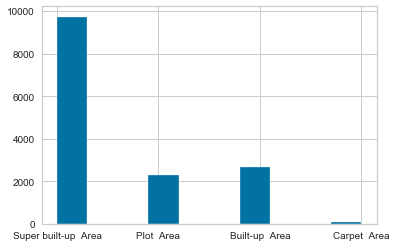

In [29]:
data1['area_type'].hist()

In [30]:
index = 0

for element in data1['area_type']:
    if str('Super built-up  Area') in str(element):
        data1.at[index,'area_type_sq_feet'] = float(1300)
        index += 1
    elif str('Carpet  Area') in str(element):
        data1.at[index,'area_type_sq_feet'] = float(1000)
        index+=1
    elif str('Built-up  Area') in str(element):
        data1.at[index,'area_type_sq_feet'] = float(1100)
        index += 1
    elif str('Plot  Area') in str(element):
        data1.at[index,'area_type_sq_feet'] = float(1500)
        index += 1
  



In [31]:
data1.head(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,total_sqft_new,area_type_sq_feet
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,1056.0,1300.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,2600.0,1500.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,1440.0,1100.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,1521.0,1300.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,1200.0,1300.0
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,1170.0,1300.0
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,2732.0,1300.0
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,3300.0,1300.0
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,1310.0,1300.0
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,1020.0,1500.0


# availability

In [32]:
data1['availability'].isnull().sum()

0

In [33]:
data1['availability'].value_counts()

Ready To Move           11743
18-Dec                    351
18-May                    324
18-Apr                    296
18-Aug                    225
19-Dec                    218
18-Jul                    160
18-Mar                    147
20-Dec                    109
18-Jun                    105
21-Dec                    103
19-Mar                     95
18-Feb                     70
18-Nov                     55
18-Jan                     49
18-Sep                     46
18-Oct                     43
19-Jun                     43
19-Jan                     43
19-Jul                     38
17-Dec                     34
20-Jan                     27
22-Jun                     23
19-Sep                     22
17-Oct                     21
19-Aug                     19
19-Oct                     19
21-Jun                     18
Immediate Possession       18
20-Aug                     17
19-Apr                     16
17-Nov                     16
17-Jun                     15
21-Mar    

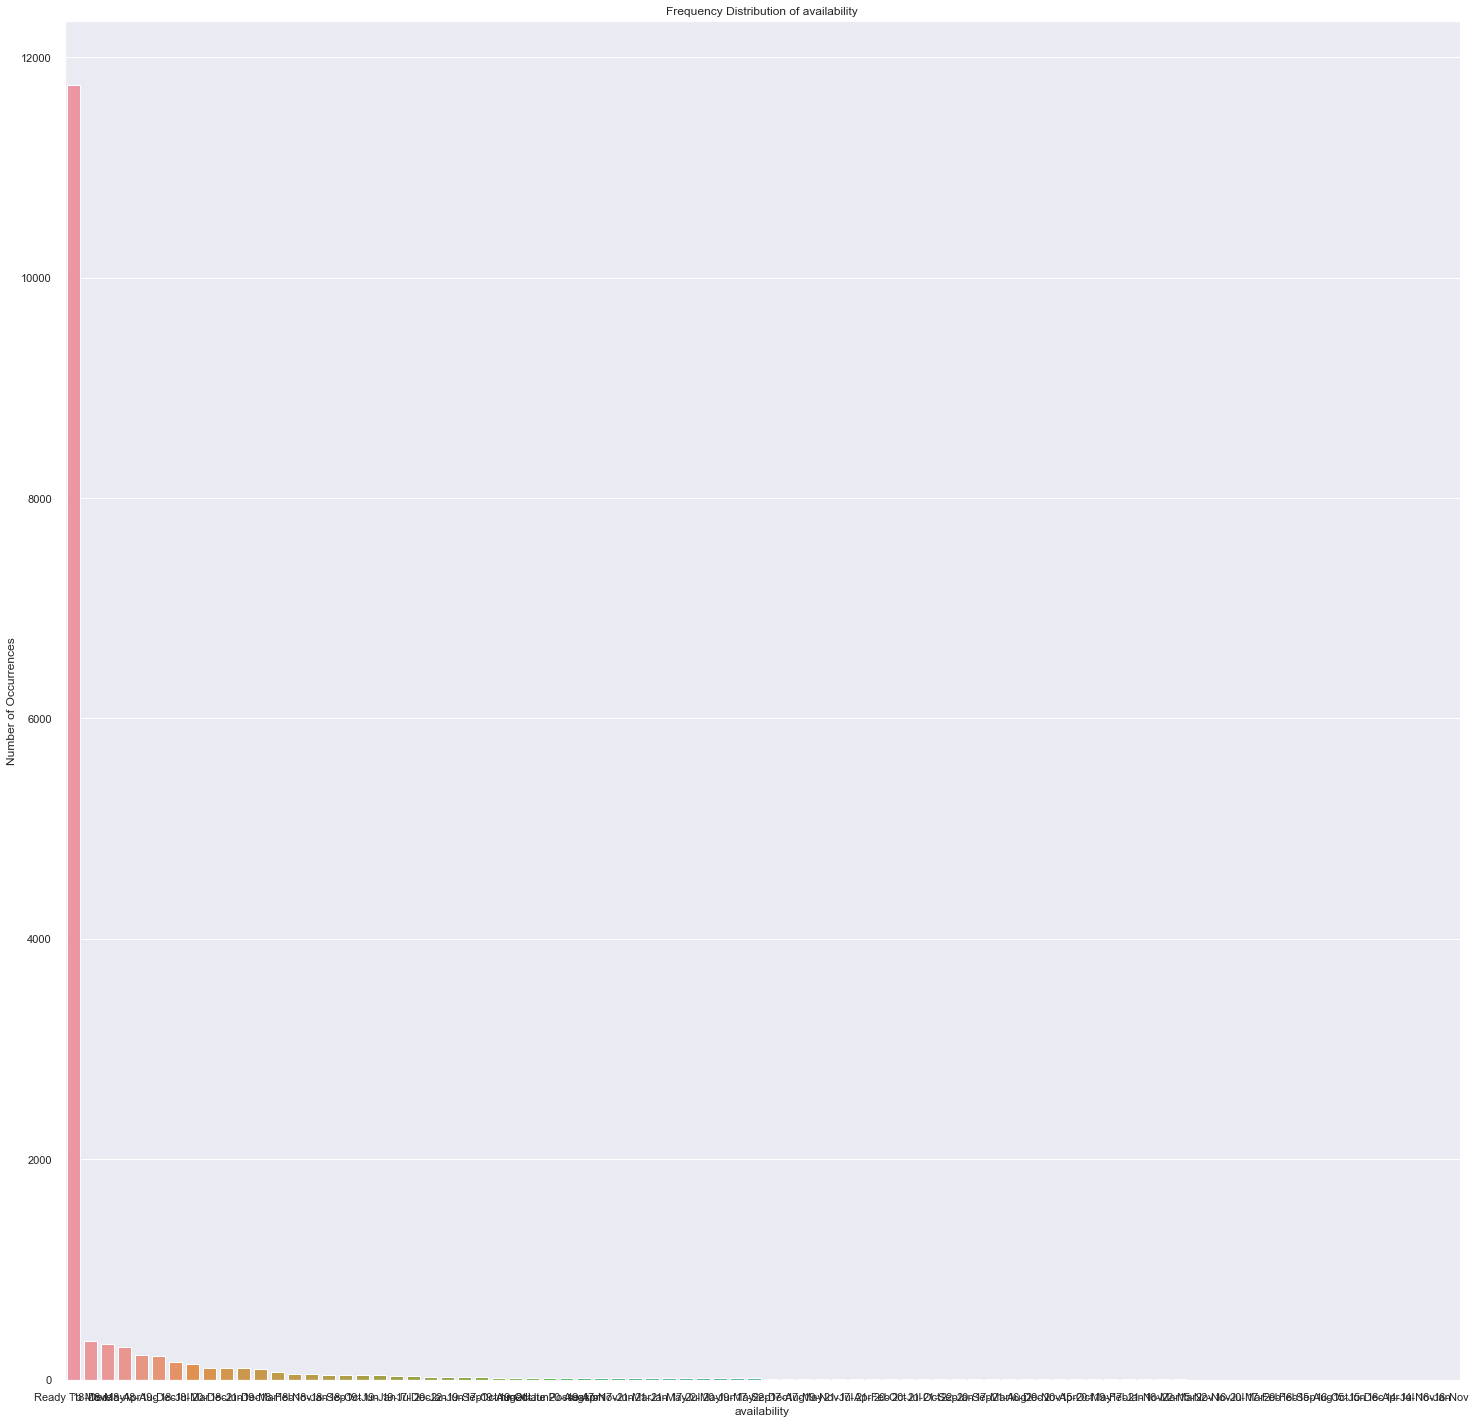

In [34]:
plt.figure(figsize=(25,25))
availability_count = data1['availability'].value_counts()
sns.set(style="darkgrid")
sns.barplot(availability_count.index, availability_count.values)
plt.title('Frequency Distribution of availability')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('availability', fontsize=12)
plt.show()

In [35]:
data1['availability'].value_counts()

Ready To Move           11743
18-Dec                    351
18-May                    324
18-Apr                    296
18-Aug                    225
19-Dec                    218
18-Jul                    160
18-Mar                    147
20-Dec                    109
18-Jun                    105
21-Dec                    103
19-Mar                     95
18-Feb                     70
18-Nov                     55
18-Jan                     49
18-Sep                     46
18-Oct                     43
19-Jun                     43
19-Jan                     43
19-Jul                     38
17-Dec                     34
20-Jan                     27
22-Jun                     23
19-Sep                     22
17-Oct                     21
19-Aug                     19
19-Oct                     19
21-Jun                     18
Immediate Possession       18
20-Aug                     17
19-Apr                     16
17-Nov                     16
17-Jun                     15
21-Mar    

In [36]:
labels = data1['availability'].astype('category').cat.categories.tolist()
availability_map_comp = {'availability' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(availability_map_comp)

{'availability': {'14-Jul': 1, '14-Nov': 2, '15-Aug': 3, '15-Dec': 4, '15-Jun': 5, '15-Nov': 6, '15-Oct': 7, '16-Apr': 8, '16-Dec': 9, '16-Jan': 10, '16-Jul': 11, '16-Mar': 12, '16-Nov': 13, '16-Oct': 14, '16-Sep': 15, '17-Apr': 16, '17-Aug': 17, '17-Dec': 18, '17-Feb': 19, '17-Jan': 20, '17-Jul': 21, '17-Jun': 22, '17-Mar': 23, '17-May': 24, '17-Nov': 25, '17-Oct': 26, '17-Sep': 27, '18-Apr': 28, '18-Aug': 29, '18-Dec': 30, '18-Feb': 31, '18-Jan': 32, '18-Jul': 33, '18-Jun': 34, '18-Mar': 35, '18-May': 36, '18-Nov': 37, '18-Oct': 38, '18-Sep': 39, '19-Apr': 40, '19-Aug': 41, '19-Dec': 42, '19-Feb': 43, '19-Jan': 44, '19-Jul': 45, '19-Jun': 46, '19-Mar': 47, '19-May': 48, '19-Nov': 49, '19-Oct': 50, '19-Sep': 51, '20-Apr': 52, '20-Aug': 53, '20-Dec': 54, '20-Feb': 55, '20-Jan': 56, '20-Jul': 57, '20-Jun': 58, '20-Mar': 59, '20-May': 60, '20-Nov': 61, '20-Oct': 62, '20-Sep': 63, '21-Aug': 64, '21-Dec': 65, '21-Feb': 66, '21-Jan': 67, '21-Jul': 68, '21-Jun': 69, '21-Mar': 70, '21-May': 7

In [37]:
type(availability_map_comp)

dict

In [38]:
availability_map= {'14-Jul': 1, '14-Nov': 2, '15-Aug': 3, '15-Dec': 4, '15-Jun': 5, '15-Nov': 6, '15-Oct': 7, '16-Apr': 8, '16-Dec': 9, '16-Jan': 10, '16-Jul': 11, '16-Mar': 12, '16-Nov': 13, '16-Oct': 14, '16-Sep': 15, '17-Apr': 16, '17-Aug': 17, '17-Dec': 18, '17-Feb': 19, '17-Jan': 20, '17-Jul': 21, '17-Jun': 22, '17-Mar': 23, '17-May': 24, '17-Nov': 25, '17-Oct': 26, '17-Sep': 27, '18-Apr': 28, '18-Aug': 29, '18-Dec': 30, '18-Feb': 31, '18-Jan': 32, '18-Jul': 33, '18-Jun': 34, '18-Mar': 35, '18-May': 36, '18-Nov': 37, '18-Oct': 38, '18-Sep': 39, '19-Apr': 40, '19-Aug': 41, '19-Dec': 42, '19-Feb': 43, '19-Jan': 44, '19-Jul': 45, '19-Jun': 46, '19-Mar': 47, '19-May': 48, '19-Nov': 49, '19-Oct': 50, '19-Sep': 51, '20-Apr': 52, '20-Aug': 53, '20-Dec': 54, '20-Feb': 55, '20-Jan': 56, '20-Jul': 57, '20-Jun': 58, '20-Mar': 59, '20-May': 60, '20-Nov': 61, '20-Oct': 62, '20-Sep': 63, '21-Aug': 64, '21-Dec': 65, '21-Feb': 66, '21-Jan': 67, '21-Jul': 68, '21-Jun': 69, '21-Mar': 70, '21-May': 71, '21-Nov': 72, '21-Oct': 73, '21-Sep': 74, '22-Dec': 75, '22-Jan': 76, '22-Jun': 77, '22-Mar': 78, '22-May': 79, '22-Nov': 80, 'Immediate Possession': 81, 'Ready To Move': 82}

In [39]:
type(availability_map)

dict

In [40]:
data1['availability_maped'] = data1['availability'].map(availability_map)

In [41]:
data1.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,total_sqft_new,area_type_sq_feet,availability_maped
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,1056.0,1300.0,42
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,2600.0,1500.0,82
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,1440.0,1100.0,82
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,1521.0,1300.0,82
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,1200.0,1300.0,82
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,1170.0,1300.0,82
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,2732.0,1300.0,36
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,3300.0,1300.0,82
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,1310.0,1300.0,82
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,1020.0,1500.0,82


In [42]:
data1['availability_maped'].isnull().sum()

0

In [43]:
# Ready To Move
# Immediate Possession
# Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec

In [44]:
# One Hot Encoding Use

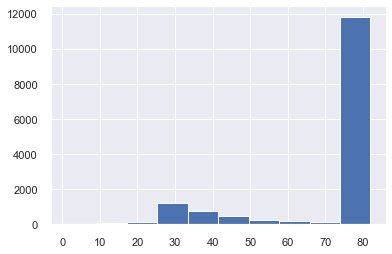

In [45]:
data1['availability_maped'].hist( bins = 10)

# location

In [46]:
data1['location'].isnull().sum()

1

In [47]:
top_253_values = data1['location'].value_counts().sort_values(ascending=False).head(253).index

In [48]:
top_253_values

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Uttarahalli', 'Hebbal',
       'Raja Rajeshwari Nagar', 'Marathahalli',
       ...
       'HAL 2nd Stage', 'Volagerekallahalli', 'Kaverappa Layout',
       'Pattandur Agrahara', 'Chandra Layout', 'Nagappa Reddy Layout',
       '4th Block Koramangala', '1st Block Koramangala',
       'Vishwanatha Nagenahalli', 'Nehru Nagar'],
      dtype='object', length=253)

In [49]:
data1['location'].mode()[0]

'Whitefield'

In [50]:
data1['location'].value_counts().index[0]

'Whitefield'

In [51]:
data1['location'].fillna(data1['location'].mode()[0], inplace=True)

In [52]:
data1['location'].isnull().sum()

0

In [53]:
data1['location'].value_counts()

Whitefield            592
Sarjapur  Road        437
Electronic City       337
Kanakpura Road        298
Thanisandra           277
                     ... 
#NAME?                  1
Shivanagar              1
Jaladarsini Layout      1
Air View Colony         1
GB Palya                1
Name: location, Length: 1358, dtype: int64

In [54]:
data1[data1['location']=='#NAME?']

,area_type,availability,location,size,society,total_sqft,bath,balcony,total_sqft_new,area_type_sq_feet,availability_maped
14577,Super built-up Area,Ready To Move,#NAME?,3 BHK,NaN,1600,2.0,1.0,1600.0,1300.0,82


In [55]:
# #NAME? replace  
data1.loc[data1['location'] == '#NAME?', 'location'] = data1['location'].mode()[0]
#data1[data1['location']=='#NAME?'] = data1['location'].mode()[0]

In [56]:
data1[data1['location']=='#NAME?']

,area_type,availability,location,size,society,total_sqft,bath,balcony,total_sqft_new,area_type_sq_feet,availability_maped


In [57]:
labels_location = data1['location'].astype('category').cat.categories.tolist()
location_map_comp = {'location' : {k: v for k,v in zip(labels_location,list(range(1,len(labels_location)+1)))}}

print(location_map_comp)

{'location': {' Anekal': 1, ' Banaswadi': 2, ' Basavangudi': 3, ' Bhoganhalli': 4, ' Devarabeesana Halli': 5, ' Devarachikkanahalli': 6, ' Electronic City': 7, ' Hoodi': 8, ' Kanakpura Road': 9, ' Mysore Highway': 10, ' Rachenahalli': 11, ' Sector 1 HSR Layout': 12, ' Thanisandra': 13, ' Whitefield': 14, ' ittamadu': 15, ' south': 16, '1 Annasandrapalya': 17, '1 Giri Nagar': 18, '1 Immadihalli': 19, '1 Ramamurthy Nagar': 20, '12th cross srinivas nagar banshankari 3rd stage': 21, '15th Block Hbr Layout': 22, '1A Block Koramangala': 23, '1Channasandra': 24, '1Hanuman Nagar': 25, '1Hoysalanagar': 26, '1Kasavanhalli': 27, '1st Block BEL Layout': 28, '1st Block HBR Layout': 29, '1st Block HRBR Layout': 30, '1st Block Jayanagar': 31, '1st Block Koramangala': 32, '1st Phase JP Nagar': 33, '1st Stage Domlur': 34, '1st Stage Indira Nagar': 35, '1st Stage Radha Krishna Layout': 36, '2 Bedroom Furnished Farm House in Kolar Road': 37, '2Electronic City Phase II': 38, '2nd Block Bel Layout': 39, '2

In [58]:
location_map = {' Anekal': 1, ' Banaswadi': 2, ' Basavangudi': 3, ' Bhoganhalli': 4, ' Devarabeesana Halli': 5, ' Devarachikkanahalli': 6, ' Electronic City': 7, ' Hoodi': 8, ' Kanakpura Road': 9, ' Mysore Highway': 10, ' Rachenahalli': 11, ' Sector 1 HSR Layout': 12, ' Thanisandra': 13, ' Whitefield': 14, ' ittamadu': 15, ' south': 16, '1 Annasandrapalya': 17, '1 Giri Nagar': 18, '1 Immadihalli': 19, '1 Ramamurthy Nagar': 20, '12th cross srinivas nagar banshankari 3rd stage': 21, '15th Block Hbr Layout': 22, '1A Block Koramangala': 23, '1Channasandra': 24, '1Hanuman Nagar': 25, '1Hoysalanagar': 26, '1Kasavanhalli': 27, '1st Block BEL Layout': 28, '1st Block HBR Layout': 29, '1st Block HRBR Layout': 30, '1st Block Jayanagar': 31, '1st Block Koramangala': 32, '1st Phase JP Nagar': 33, '1st Stage Domlur': 34, '1st Stage Indira Nagar': 35, '1st Stage Radha Krishna Layout': 36, '2 Bedroom Furnished Farm House in Kolar Road': 37, '2Electronic City Phase II': 38, '2nd Block Bel Layout': 39, '2nd Block Hbr Layout': 40, '2nd Block Hrbr Layout': 41, '2nd Block Jayanagar': 42, '2nd Block Koramangala': 43, '2nd Phase JP Nagar': 44, '2nd Phase Judicial Layout': 45, '2nd Stage Arekere Mico Layout': 46, '2nd Stage Nagarbhavi': 47, '2nd phase jp nagar, jp nagar': 48, '3rd Block Banashankari': 49, '3rd Block HBR Layout': 50, '3rd Block Hrbr Layout': 51, '3rd Block Jayanagar': 52, '3rd Block Koramangala': 53, '3rd Phase Iti Layout': 54, '3rd Phase JP Nagar': 55, '3rd Stage Raja Rajeshwari Nagar': 56, '4 Bedroom Farm House in Bagalur': 57, '4th Block HBR Layout': 58, '4th Block Jayanagar': 59, '4th Block Koramangala': 60, '4th Phase JP Nagar': 61, '4th T block Jayanagar': 62, '5 Bedroom Farm House in Lakshmipura': 63, '5th Block Hbr Layout': 64, '5th Block Jayanagar': 65, '5th Phase JP Nagar': 66, '5th Stage BEML Layout': 67, '5th block Koramangala': 68, '6th Block Jayanagar': 69, '6th Block Rajaji Nagar': 70, '6th Phase JP Nagar': 71, '6th block Koramangala': 72, '6th block banashankari 3rd stage, 100 feet ORR': 73, '7th Block Jayanagar': 74, '7th Block Koramangala': 75, '7th Phase JP Nagar': 76, '8th Block Jayanagar': 77, '8th Phase JP Nagar': 78, '8th block Koramangala': 79, '9th Block Jayanagar': 80, '9th Phase JP Nagar': 81, 'A Narayanapura': 82, 'AECS LAYOUT A-BLOCK Singasandra': 83, 'AECS Layout': 84, 'AGB Layout': 85, 'AGS Layout': 86, 'AMS Layout': 87, 'Aavalahalli': 88, 'Abbaiah Reddy Layout': 89, 'Abbigere': 90, 'Abshot Layout': 91, 'Achins Road': 92, 'Adarsh Nagar': 93, 'Addischetan Layout': 94, 'Adityanagar': 95, 'Adugodi': 96, 'Aga Abbas Ali Road': 97, 'Agara Village': 98, 'Agrahara Dasarahalli': 99, 'Air View Colony': 100, 'Aishwarya Crystal Layout': 101, 'Akash Nagar': 102, 'Akshaya Nagar': 103, 'Akshaya Vana': 104, 'Akshayanagara East': 105, 'Akshayanagara West': 106, 'Akshya Nagar': 107, 'Alfa Garden Layout': 108, 'Allalasandra': 109, 'Alur': 110, 'Amam Enclave Layout': 111, 'Amarjyothi Colony': 112, 'Ambalipura': 113, 'Ambedkar Colony': 114, 'Ambedkar Nagar': 115, 'Amblipura': 116, 'Amco Colony': 117, 'Amrita Nagar': 118, 'Amruthahalli': 119, 'Amruthnagar': 120, 'Anand Nagar': 121, 'Anand nagar': 122, 'Anandapura': 123, 'Anantapura': 124, 'Anantapuram': 125, 'Ananth Nagar': 126, 'Ananthanagar Phase 1,Electronic City , phase 2': 127, 'Ananthapura, T C palaya Main Road': 128, 'Anathanagar': 129, 'Andrahalli': 130, 'Anekal': 131, 'Anekal - Hosur Road': 132, 'Anjana Nagar': 133, 'Anjanapura': 134, 'Anjappa Layout': 135, 'Ankappa Layout': 136, 'Annaiah Reddy Layout': 137, 'Annapoorneshwari Layout, JP nagar 7th phase': 138, 'Annapurneshwari Nagar': 139, 'Annasandrapalya': 140, 'Anugrah Layout': 141, 'Anwar Layout': 142, 'Arasanakunte': 143, 'Ardendale': 144, 'Arehalli': 145, 'Arekempanahalli': 146, 'Arekere': 147, 'Arishinakunte': 148, 'Ashirvad Colony': 149, 'Ashok Nagar': 150, 'Ashraya Layout': 151, 'Ashwath Nagar': 152, 'Ashwathnagar': 153, 'Ashwini layout': 154, 'Asthagrama Layout': 155, 'Atmananda Colony': 156, 'Attibele': 157, 'Attiguppe': 158, 'Attur Layout': 159, 'Austin Town': 160, 'Avalahalli': 161, 'Ayappa Nagar': 162, 'B Channasandra': 163, 'B K Nagar': 164, 'B Narayanapura': 165, 'B Y Raveshwara Nagar': 166, 'BAGUR': 167, 'BAGUR ROAD': 168, 'BCC Layout': 169, 'BCMC Layout': 170, 'BDS Layout': 171, 'BEL Layout': 172, 'BEL Road': 173, 'BEML Layout': 174, 'BEML Layout 5th Stage': 175, 'BEML Layout 5th stage': 176, 'BHEL Layout': 177, 'BSK STAGE 2': 178, 'BSM Extension': 179, 'BTM 1st Stage': 180, 'BTM 2nd Stage': 181, 'BTM 4th Stage': 182, 'BTM Layout': 183, 'BTM Layout 1stage 9th Main': 184, 'BTM Layout 2nd Stage 1st Phase': 185, 'Baba Nagar': 186, 'Babusapalaya': 187, 'Badavala Nagar': 188, 'Badrappa Layout': 189, 'Bagalakunte': 190, 'Bagalur': 191, 'Bagalur Main Road': 192, 'Bahubali Nagar': 193, 'Balagere': 194, 'Balaji Gardens Layout': 195, 'Balepet': 196, 'Banagiri Nagar': 197, 'Banagirinagar': 198, 'Banasawadi, ': 199, 'Banashankari': 200, 'Banashankari 2 nd Stage': 201, 'Banashankari 2nd Stage': 202, 'Banashankari 3rd stage, Vivekanandanagar': 203, 'Banashankari 6th Stage': 204, 'Banashankari 6th Stage ,Subramanyapura': 205, 'Banashankari 6th stage , 2nd block': 206, 'Banashankari Stage I': 207, 'Banashankari Stage II': 208, 'Banashankari Stage III': 209, 'Banashankari Stage V': 210, 'Banashankari Stage VI': 211, 'Banashankari stage 2': 212, 'Banashankari3rd stage bigbazar': 213, 'Banaswadi': 214, 'Banaswadi, ': 215, 'Bande Nallasandra': 216, 'Bandepalya': 217, 'Banjara Layout': 218, 'Bank Avenue': 219, 'Bank Of Baroda Colony': 220, 'Bannerghatta': 221, 'Bannerghatta Road': 222, 'Bapuji Layout': 223, 'Bapuji Nagar': 224, 'Basapura': 225, 'Basava Nagar': 226, 'Basavanagara': 227, 'Basavanapura': 228, 'Basavangudi': 229, 'Basavanna Nagar': 230, 'Basaveshwara Nagar': 231, 'Basaveshwara Nagar Yelahanka': 232, 'Basaveswarnagar': 233, 'Basnashankari,6th stage,': 234, 'Basvasamithi Layout Vidyaranyapura': 235, 'Battarahalli': 236, 'Begur': 237, 'Begur Road': 238, 'Behind Don Bosco Church': 239, 'Belathur': 240, 'Belatur': 241, 'Bellandur': 242, 'Bellandur ORR': 243, 'Bellandur, ': 244, 'Bellari Road': 245, 'Beml layout, Rajarajeshwari nagar': 246, 'Bendiganahalli': 247, 'Bennigana Halli': 248, 'Benson Town': 249, 'Bethel Nagar': 250, 'Bettadasanapura': 251, 'Bettahalsoor': 252, 'Bhagyalakshmi Avenue': 253, 'Bharat Nagar': 254, 'Bharath Housing Society Layout': 255, 'Bharathi Nagar': 256, 'Bharathnagar': 257, 'Bhattarahalli': 258, 'Bhoganhalli': 259, 'Bhoopsandra': 260, 'Bhuvaneshwari Nagar': 261, 'Bhuvaneswari Nagar': 262, 'Bidadi': 263, 'Bidere Agarahara, Behind Safal market': 264, 'Bidrahalli': 265, 'Bikasipura': 266, 'Bilal Nagar': 267, 'Bileshivale': 268, 'Billamaranahalli': 269, 'Billapura': 270, 'Billekahalli': 271, 'Binnamangala': 272, 'Binny Mills Employees Colony': 273, 'Binny Pete': 274, 'Bisuvanahalli': 275, 'Bommanahalli': 276, 'Bommasandra': 277, 'Bommasandra Industrial Area': 278, 'Bommenahalli': 279, 'Brigade Road': 280, 'Brindavan Layout': 281, 'Brindavan Nagar': 282, 'Brooke Bond First Cross': 283, 'Brookefield': 284, 'Budigere': 285, 'Bull Temple Road': 286, 'Byadarahalli': 287, 'Byagadadhenahalli': 288, 'Byappanahalli': 289, 'Byatarayanapura': 290, 'Byrasandra': 291, 'Byrasandra Extension': 292, 'Byrathi Village': 293, 'C P Cassia Apartment,': 294, 'CHIKKATIRUPATHI': 295, 'CMH Road': 296, 'CQAL LAYOUT C BLOCK': 297, 'CQAL Layout': 298, 'CR Layout': 299, 'CV Raman Nagar': 300, 'Cambridge  road': 301, 'Cambridge Layout': 302, 'Canara Bank Colony': 303, 'Canara Bank Layout': 304, 'Carmelaram': 305, 'Celebrity Paradise Layout': 306, 'Chaitanya Ananya': 307, 'Challaghatta': 308, 'Chambenahalli': 309, 'Chamrajpet': 310, 'Chamundi Nagar': 311, 'Chandapura': 312, 'Chandra Layout': 313, 'Channasandra': 314, 'Channasandra Layout': 315, 'Chelekare': 316, 'Chellikere': 317, 'Chennammana Kere': 318, 'Chennammanakere Achukattu': 319, 'Chennappa Layout': 320, 'Chickpet': 321, 'Chikbasavanapura': 322, 'Chikka Banaswadi': 323, 'Chikka Gowdanapalya.': 324, 'Chikka Tirupathi': 325, 'Chikkaballapur': 326, 'Chikkabanavar': 327, 'Chikkabettahalli': 328, 'Chikkabidarakallu': 329, 'Chikkadunnasandra': 330, 'Chikkagubbi': 331, 'Chikkajala': 332, 'Chikkakannalli': 333, 'Chikkalasandra': 334, 'Chikkanahalli': 335, 'Chikkasandra': 336, 'Chikkasanne': 337, 'Chikkathoguru': 338, 'Chikku Lakshmaiah Layout': 339, 'Chinnapa Garden': 340, 'Chinnapanahalli': 341, 'Chokkahalli': 342, 'Chokkanahalli': 343, 'Chokkasandra': 344, 'Cholanayakanahalli': 345, 'Choodasandra': 346, 'Chowdeshwari Layout': 347, 'Chuchangatta Colony': 348, 'Church Street': 349, 'Ckikkakammana Halli': 350, 'Classic Paradise Layout': 351, 'Cleveland Town': 352, 'Coconut Garden': 353, 'Coconut Grove Layout': 354, 'Coffee Board Layout': 355, 'Cooke Town': 356, 'Cottonpet': 357, 'Cox Town': 358, 'Craig Park Layout': 359, 'Crimson Layout': 360, 'Cubbon Road': 361, 'Cunningham Road': 362, 'D Group Employees Layout': 363, 'D Souza Layout': 364, 'DUO Layout': 365, 'Daadys Gaarden Layout': 366, 'Dairy Circle': 367, 'Dasanapura': 368, 'Dasappa Layout': 369, 'Dasarahalli': 370, 'Deepanjali Nagar': 371, 'Defence Colony': 372, 'Defence Layout': 373, 'Dena Bank Colony': 374, 'Devanahalli': 375, 'Devanahalli Int. Airport': 376, 'Devanahalli Road': 377, 'Devara Jeevanahalli': 378, 'Devarabeesana Halli': 379, 'Devarabisanahalli': 380, 'Devarachikkanahalli': 381, 'Devasandra Extension': 382, 'Devasthanagalu': 383, 'Devi Nagar': 384, 'Dhanalakshmi Layout': 385, 'Dinnur': 386, 'Divya Unnathi Layout': 387, 'Doctor Layout Rayasandra': 388, 'Doctors Layout': 389, 'Dodda Banaswadi': 390, 'Dodda Kempaiah Layout': 391, 'Dodda Nekkundi': 392, 'Dodda Nekkundi Extension': 393, 'Doddaballapur': 394, 'Doddabanahalli': 395, 'Doddabele': 396, 'Doddabidrakallu': 397, 'Doddabommasandra': 398, 'Doddagubbi': 399, 'Doddakallasandra': 400, 'Doddakammanahalli': 401, 'Doddakannelli': 402, 'Doddanakundi Industrial Area 2': 403, 'Doddanakunte': 404, 'Doddanekundi': 405, 'Doddathoguru': 406, 'Dodsworth Layout': 407, 'Dollar Scheme Colony': 408, 'Dollars Colony': 409, 'Dollars Layout': 410, 'Dominic Layout': 411, 'Domlur': 412, 'Domlur Layout': 413, 'Dommasandra': 414, 'Doopanahalli': 415, 'Dooravani Nagar': 416, 'Double Road': 417, 'Dr Shivarama Karantha Nagar': 418, 'Duddanahalli': 419, 'Duvasapalya': 420, 'Dwaraka Nagar': 421, 'Dwarka Nagar': 422, 'ECC Road, Whitefield, ': 423, 'EPIP AREA, WHITEFIELD': 424, 'EPIP Zone': 425, 'East Colony': 426, 'Ejipura': 427, 'Electronic City': 428, 'Electronic City Phase 1, ': 429, 'Electronic City Phase II': 430, 'Electronic city Phase 1, ': 431, 'Electronic city phase 1, ': 432, 'Electronics City Phase 1': 433, 'Escorts Colony': 434, 'Esther Enclave Layout': 435, 'Ex-Servicemen Colony Dinnur Main Road R.T.Nagar': 436, 'Ferrar Nagar': 437, 'Fraser town': 438, 'Frazer Town': 439, 'Friends Colony': 440, 'GB Palya': 441, 'GD Layout': 442, 'GKW Layout': 443, 'GM Palaya': 444, 'Gandhi Bazar': 445, 'Gandhi Nagar': 446, 'Ganesha Block': 447, 'Ganga Nagar': 448, 'Ganga Nagar Extension': 449, 'Ganganahalli': 450, 'Gangondanahalli': 451, 'Garden Layout': 452, 'Garebhavipalya': 453, 'Garudachar Palya': 454, 'Gattahalli': 455, 'Gattigere': 456, 'Gaundanapalya': 457, 'Gaurava Nagar': 458, 'Gayathri Nagar': 459, 'Geddalahalli': 460, 'Geetanjali Layout': 461, 'Geleyara Balaga Layout': 462, 'Gidada Konnenahalli': 463, 'Giri Nagar': 464, 'Gkvk Layout': 465, 'Glass Factory Layout': 466, 'Gnana Bharathi': 467, 'Gokaula Extension': 468, 'Gokula Extension': 469, 'Gollahalli': 470, 'Gollarahatti': 471, 'Gollarapalya Hosahalli': 472, 'Gopal Reddy Layout': 473, 'Gopalapura': 474, 'Gopalkrishna Nagar': 475, 'Goraguntepalya': 476, 'Gottigere': 477, 'Govindapura': 478, 'Govindaraja Nagar Ward': 479, 'Govindpura': 480, 'Govindraja Nagar': 481, 'Gowdanapalya': 482, 'Green Domain Layout': 483, 'Green Garden Layout': 484, 'Green Glen Layout': 485, 'Green View Layout': 486, 'Green Woods Layout': 487, 'Grihalakshmi Layout': 488, 'Gubbalala': 489, 'Gubbi Cross, Hennur Main Road': 490, 'Guddadahalli': 491, 'Gulakamale': 492, 'Gulimangala': 493, 'Guni Agrahara': 494, 'Gunjur': 495, 'Gunjur Palya': 496, 'HAL 2nd Stage': 497, 'HAL 3rd Stage': 498, 'HAL Layout': 499, 'HBR Layout': 500, 'HMT Layout': 501, 'HOSUR MAIN ROAD': 502, 'HOSUR RMAIN ROAD': 503, 'HRBR Layout': 504, 'HSR Layout': 505, 'HSR Layout 7th sector, ': 506, 'Hadosiddapura': 507, 'Hagadur': 508, 'Hal old airport road': 509, 'Halanayakanahalli': 510, 'Hallehalli': 511, 'Handenahalli': 512, 'Hanuma Reddy Layout': 513, 'Hanumagiri': 514, 'Hanuman Nagar': 515, 'Hanumanth Nagar': 516, 'Hanumantha Nagar': 517, 'Haralur Road': 518, 'Haralur Road, ': 519, 'Harappanahalli': 520, 'Harlur': 521, 'Harohalli': 522, 'Harsha Layout': 523, 'Havanur extension': 524, 'Hebbal': 525, 'Hebbal Kempapura': 526, 'Hegde Nagar': 527, 'Hegganahalli': 528, 'Hennagara': 529, 'Hennur': 530, 'Hennur Bande': 531, 'Hennur Busstop': 532, 'Hennur Gardens': 533, 'Hennur Road': 534, 'Herohalli': 535, 'Hessarghatta': 536, 'High grounds': 537, 'Himagiri Meadows': 538, 'Hiremath Layout': 539, 'Hommadevanahalli': 540, 'Hongasandra': 541, 'Hoodi': 542, 'Hoodi Circle, ': 543, 'Hoodi Layout': 544, 'Horamavu Agara': 545, 'Horamavu Banaswadi': 546, 'Hormavu': 547, 'Hosa Road': 548, 'Hosahalli': 549, 'Hosahalli Extension': 550, 'Hosakerehalli': 551, 'Hosakerehalli Layout': 552, 'Hosapalya': 553, 'Hoskote': 554, 'Hoskote near': 555, 'Hosur Road': 556, 'Housing Board Layout Vijay Nagar': 557, 'Howthinarayanappa Garden': 558, 'Hoysalanagar': 559, 'Hsr layout sector3': 560, 'Hulimavu': 561, 'Hullahalli': 562, 'Hunasamaranahalli': 563, 'Huskur': 564, 'Huttanahalli': 565, 'ISRO Layout': 566, 'ITI Employees Layout': 567, 'ITI Layout': 568, 'ITPL': 569, 'IVC Road': 570, 'Iblur Village': 571, 'Iggalur': 572, 'Ilyas Nagar': 573, 'Immadihalli': 574, 'Inasappa Layout': 575, 'Indira Nagar': 576, 'Indira Nagar 3rd Stage': 577, 'Indira Nagar Stage 2': 578, 'Indiranagar HAL 2nd Stage': 579, 'Indra Nagar': 580, 'Indranagar  100ft road defence colony': 581, 'Infantry Road': 582, 'Ittamadu': 583, 'J C Nagar': 584, 'J P Nagar 7th Phase Ramayya City': 585, 'J.P.Nagar 6th Phase , sarakki nagar': 586, 'J.P.nagar 6th Phase.Sarakki Nagar': 587, 'JCR Layout': 588, 'JP Nagar': 589, 'JP Nagar 7th Phase, ': 590, 'JP Nagar 8th Phase, ': 591, 'JP nagar 9th Phase, ': 592, 'JP nagar 9th phase , ': 593, 'Jagadish Nagar': 594, 'Jagajyothi layout': 595, 'Jai Bheema Nagar': 596, 'Jakkasandra': 597, 'Jakkasandra Extension': 598, 'Jakkur': 599, 'Jakkur Plantation': 600, 'JakkurYelahanka': 601, 'Jakkuru Layout': 602, 'Jaladarsini Layout': 603, 'Jalahalli': 604, 'Jalahalli East': 605, 'Jalahalli West': 606, 'Janatha Colony': 607, 'Jaraganahalli Jp Nagar Post': 608, 'Javarandoddi': 609, 'Jay an agar 4 T Block': 610, 'Jaya Mahal layout': 611, 'Jaya Nagar East': 612, 'Jayamahal': 613, 'Jayamahal Extension': 614, 'Jayanagar': 615, 'Jayanagar, ': 616, 'Jayanti Nagar': 617, 'Jaymahal Road': 618, 'Jeevan bima nagar': 619, 'Jeevanhalli': 620, 'Jigani': 621, 'Jinkethimmanahalli': 622, 'Jnana Ganga Nagar': 623, 'Jnanabharathi Layout': 624, 'Jogupalya': 625, 'Jp nagar 8th Phase .': 626, 'Judicial Layout': 627, 'Judicial Layout, Kanakapura Road, ': 628, 'Junnasandra': 629, 'Jyothi Nagar': 630, 'K G Colony': 631, 'K N Extension': 632, 'K R C kothanur': 633, 'KAMAKIYA': 634, 'KAS Officers Colony': 635, 'KEB Colony': 636, 'KG Halli': 637, 'KHB Colony Extension': 638, 'KPC Layout': 639, 'KR Garden': 640, 'KR Layout': 641, 'KR Puram': 642, 'KSRTC Layout': 643, 'KUDLU MAIN ROAD': 644, 'Kachanayakanahalli': 645, 'Kacharakanahalli': 646, 'Kada Agrahara': 647, 'Kadabagere': 648, 'Kadarenahalli': 649, 'Kadubeesanahalli': 650, 'Kadugodi': 651, 'Kadugondanahalli': 652, 'Kaggadasapura': 653, 'Kaggalipura': 654, 'Kaikondrahalli': 655, 'Kalasipalya': 656, 'Kalena Agrahara': 657, 'Kalhalli': 658, 'Kalidasa Layout': 659, 'Kalkere': 660, 'Kalkere Channasandra': 661, 'Kallumantapa': 662, 'Kalyan nagar': 663, 'Kamakshipalya': 664, 'Kamakya Layout': 665, 'Kamala Nagar': 666, 'Kambipura': 667, 'Kamdhenu Nagar': 668, 'Kammagondahalli': 669, 'Kammanahalli': 670, 'Kammasandra': 671, 'Kanaka Nagar': 672, 'Kanakadasa Layout': 673, 'Kanakapur main road': 674, 'Kanakapura': 675, 'Kanakapura  Rod': 676, 'Kanakapura Main Road': 677, 'Kanakapura Road': 678, 'Kanakapura Road, ': 679, 'Kanakapura main  Road': 680, 'Kanakpura Road': 681, 'Kannamangala': 682, 'Kannur': 683, 'Kariyammana Agrahara': 684, 'Karnataka Shabarimala': 685, 'Karuna Nagar': 686, 'Kasavanhalli': 687, 'Kashi Nagar': 688, 'Kasthuri Nagar East Of NGEF': 689, 'Kasturi Nagar': 690, 'Kathreguppe': 691, 'Kathriguppe': 692, 'Kathriguppe IV Phase': 693, 'Kattigenahalli': 694, 'Kauser Nagar': 695, 'Kaval Byrasandra': 696, 'Kaverappa Layout': 697, 'Kaveri Nagar': 698, 'Kavika Layout': 699, 'Keerthi Layout': 700, 'Kempapura': 701, 'Kempegowda Nagar': 702, 'Kenchanehalli R R Nagar': 703, 'Kenchenahalli': 704, 'Kenchenhalli': 705, 'Kengeri': 706, 'Kengeri Hobli': 707, 'Kengeri Satellite Town': 708, 'Kengeri Satellite Town ( BDA SITE)': 709, 'Kengeri Satellite Town KHB Apartment': 710, 'Kengeri Satellite Town Stage 1': 711, 'Kengeri Satellite Town Stage II': 712, 'Kereguddadahalli': 713, 'Keshava Nagar': 714, 'Kirloskar Layout': 715, 'Kirloskar layout, Basaveshwarnagar': 716, 'Kithaganur': 717, 'Kodanda Reddy Layout': 718, 'Kodathi': 719, 'Kodbisanhalli': 720, 'Kodichikkanahalli': 721, 'Kodigehaali': 722, 'Kodigehalli': 723, 'Kodihalli': 724, 'Kodipalya': 725, 'Kogilu': 726, 'Konanakunte': 727, 'Konanakunte Cross': 728, 'Konappana Agrahara': 729, 'Konena Agrahara': 730, 'Koppa': 731, 'Koppa village': 732, 'Koramangala': 733, 'Koramangala Industrial Layout': 734, 'Kothannur': 735, 'Kothanur': 736, 'Kothnoor Dinne': 737, 'Kothnur Narayanapura': 738, 'Krishna Nagar': 739, 'Krishna Reddy Layout': 740, 'Kudlu': 741, 'Kudlu Gate': 742, 'Kudlu Village, ': 743, 'Kullappa Colony': 744, 'Kumara Park': 745, 'Kumarapalli': 746, 'Kumaraswami Layout': 747, 'Kumbalgodu': 748, 'Kumbena Agrahara': 749, 'Kumbhena Agrahara': 750, 'Kundalahalli': 751, 'Kundalahalli Colony': 752, 'Kurubarahalli': 753, 'Kurudusonnenahalli': 754, 'Kuvempu Layout': 755, 'Kuvempu Nagar': 756, 'Kyalasanahalli': 757, 'LB Shastri Nagar': 758, 'LIC Colony': 759, 'Laggere': 760, 'Lake City': 761, 'Lakkasandra': 762, 'Lakkasandra Extension': 763, 'Lakshmi Layout': 764, 'Lakshmiamma Garden': 765, 'Lakshminarayana Pura': 766, 'Lakshminarayanapura, Electronic City Phase 2': 767, 'Lakshmipura': 768, 'Lakshmipura Vidyaanyapura': 769, 'Lal Bahadur Shastri Nagar': 770, 'Lalbagh Road': 771, 'Langford Gardens': 772, 'Langford Town': 773, 'Lavakusha Nagar': 774, 'Lavelle Road': 775, 'Laxmi Sagar Layout': 776, 'Laxminarayana Layout': 777, 'Lingadheeranahalli': 778, 'Lingarajapuram': 779, 'Lottegolla Halli': 780, 'M C Layout': 781, 'M V Extenstion': 782, 'M.G Road': 783, 'MCECHS  layout': 784, 'MEI layout, Bagalgunte': 785, 'MLA Layout': 786, 'MM Layout': 787, 'MRCR Layout': 788, 'MS Pallya': 789, 'Madanayakahalli': 790, 'Madavara': 791, 'Madiwala': 792, 'Magadi Road': 793, 'Mahadevpura': 794, 'Mahaganapathy Nagar': 795, 'Mahalakshmi Layout': 796, 'Mahalakshmi Puram': 797, 'Maheswari Nagar': 798, 'Mailasandra': 799, 'Maithri Layout': 800, 'Makali': 801, 'Malimakanapura': 802, 'Mallappa Layout': 803, 'Mallasandra': 804, 'Mallathahalli': 805, 'Malleshpalya': 806, 'Malleshwaram': 807, 'Malur Hosur Road': 808, 'Manayata Tech Park': 809, 'Mangammanapalya': 810, 'Manganahalli': 811, 'Mango Garden Layout': 812, 'Manjunath Nagar': 813, 'Manjunatha Layout': 814, 'Manonarayanapalya': 815, 'Manorayana Palya': 816, 'Maragondana Halli, kr puram, old madras road': 817, 'Maragondanahalli': 818, 'Marasandra': 819, 'Marathahalli': 820, 'Marathalli bridge': 821, 'Marathi Layout': 822, 'Marenahalli': 823, 'Margondanahalli': 824, 'Mariyannapalya': 825, 'Marsur': 826, 'Maruthi Extension': 827, 'Maruthi HBCS Layout': 828, 'Maruthi Layout': 829, 'Maruthi Nagar': 830, 'Maruthi Sevanagar': 831, 'Maruthi nagar kogilu': 832, 'Masjid e Alkareem': 833, 'Mathikere': 834, 'Mathikere Extension': 835, 'Mathikere SBM colony': 836, 'Medahalli': 837, 'Medaralli': 838, 'Medi Agrahara': 839, 'Meenakshi Layout': 840, 'Meenakunte': 841, 'Michael Palaya': 842, 'Mico Layout': 843, 'Milk Colony': 844, 'Millers Road': 845, 'Moodalapalya': 846, 'Motappa Layout': 847, 'Mudalpalaya': 848, 'Mukkutam Nagar': 849, 'Mullur': 850, 'Muneshwara Nagar': 851, 'Muni reddy layout': 852, 'Munireddy Layout': 853, 'Munivenkatppa Layout': 854, 'Munnekollal': 855, 'Murugeshpalya': 856, 'Muthurayya Swamy Layout': 857, 'Muthyala Nagar': 858, 'Mylasandra': 859, 'Mysore Road': 860, 'N R Layout': 861, 'NGR Layout': 862, 'NR Colony': 863, 'NRI Layout': 864, 'NS Palya': 865, 'NTI Layout': 866, 'Nagadevanahalli': 867, 'Naganathapura': 868, 'Nagappa Reddy Layout': 869, 'Nagaraja Garden': 870, 'Nagarathpet': 871, 'Nagarbhavi': 872, 'Nagarbhavi  BDA Complex': 873, 'Nagarbhavi Garden Villas Layout': 874, 'Nagasandra': 875, 'Nagashetty Halli': 876, 'Nagavara': 877, 'Nagavarapalya': 878, 'Nagawara Junction': 879, 'Nagondanahalli': 880, 'Naidu Layout': 881, 'Nallurhalli': 882, 'Nandi Durga Road': 883, 'Nandi Hills': 884, 'Nandini Layout': 885, 'Nanjappa Garden': 886, 'Nanjappa Layout': 887, 'Nanjappa Layout Vidyaranyapura': 888, 'Narasapura': 889, 'Narayana Nagar 1st Block': 890, 'Narayanaghatta': 891, 'Narayanappa Garden': 892, 'Narayanappa Layout': 893, 'Narayanapura': 894, 'Navodaya Nagar': 895, 'Nayandanahalli': 896, 'Ncpr Industrial Layout': 897, 'Near Electronic City, ': 898, 'Near International Airport': 899, 'Near ullas theater': 900, 'Neeladri Nagar': 901, 'Neelamangala': 902, 'Neelasandra': 903, 'Nehru Nagar': 904, 'Nelamangala': 905, 'New Baiyyappanahalli': 906, 'New Bank Colony': 907, 'New Gurappana Palya': 908, 'New Thippasandra': 909, 'Ngef Layout': 910, 'Nirman Layout': 911, 'Nisarga Layout': 912, 'Nobo Nagar': 913, 'Nrupathunga Nagar': 914, 'Nyanappana Halli': 915, 'OLd Gurappanapalya': 916, 'OMBR Layout': 917, 'Off Bannergatta Road': 918, 'Off Bannergatta road': 919, 'Off Sarjapur Road, ': 920, 'Off Sarjapur road, ': 921, 'Okalipura': 922, 'Old Airport Road': 923, 'Old Madras Road': 924, 'Old Mangammanapalya Road': 925, 'Old Town': 926, 'Omarbagh Layout': 927, 'Omkar Nagar': 928, 'Outer Ring Road East': 929, 'P Krishnappa Layout': 930, 'P&T Colony': 931, 'P&T Layout': 932, 'PARAPPANAAGHRARA': 933, 'PC Palaya': 934, 'PNS Layout': 935, 'Padarayana Pura': 936, 'Padmanabhanagar': 937, 'Pai Layout': 938, 'Pai layout , Mahadevapura': 939, 'Palace Guttahalli': 940, 'Palace Road': 941, 'Palanahalli': 942, 'Pampa Extension': 943, 'Panathur': 944, 'Panathur Road, ': 945, 'Panduranga Nagar': 946, 'Papareddipalya': 947, 'Parappana Agrahara': 948, 'Park View Layout': 949, 'Patelappa Layout': 950, 'Pattanagere': 951, 'Pattandur Agrahara': 952, 'Pattegarhpalya': 953, 'Peenya': 954, 'Phase 1 Kammasandra': 955, 'Pillahalli': 956, 'Pillanna Gardens': 957, 'Poorna Pragna Layout': 958, 'Poornapragna Housing Society Layout': 959, 'Popular Colony': 960, 'Postal Colony': 961, 'Pragathi Nagar': 962, 'Prakash Nagar': 963, 'Prakruthi Nagar': 964, 'Prakruthi Township': 965, 'Prasanna layout Herohalli': 966, 'Prasanth Extension': 967, 'Prasanti Nagar': 968, 'Prashanth Nagar': 969, 'Prestige Sunrise': 970, 'Prithvi Layout': 971, 'Pulikeshi Nagar': 972, 'Pulkeshi Nagar': 973, 'Punappa Layout': 974, 'Puttanahalli': 975, 'Puttappa Layout': 976, 'Queens Road': 977, 'R.T. Nagar': 978, 'RBI Layout': 979, 'RK Colony': 980, 'RK Layout 2nd Stage': 981, 'RMC YARD': 982, 'RMV': 983, 'RMV 2nd Stage': 984, 'RMV Extension': 985, 'RMV Extension Stage 2': 986, 'RMV extension stage 2, rmv extension': 987, 'RPC layout': 988, 'RR Layout': 989, 'RR Nagar': 990, 'RTO ullalu': 991, 'RWF West Colony': 992, 'Race Course Road': 993, 'Rachenahalli': 994, 'Raghavendra Layout': 995, 'Raghavendra Nagar': 996, 'Raghuvanahalli': 997, 'Rahat Bagh': 998, 'Rahmath Nagar': 999, 'Rainbow Drive': 1000, 'Raj Mahal Vilas Extension': 1001, 'Raja Rajashware nagar': 1002, 'Raja Rajashweri Nagar': 1003, 'Raja Rajeshwari Nagar': 1004, 'Raja Rajeshwari Nagar 5th Stage': 1005, 'Raja Rajeshwari Nagara': 1006, 'Raja rajeswarinagar 5th Stage': 1007, 'Rajagopala Nagar': 1008, 'Rajaji Nagar': 1009, 'Rajankunte': 1010, 'Rajanna Layout': 1011, 'Rajapura': 1012, 'Rajarajesheari nagar': 1013, 'Rajarajeshwari Nagar': 1014, 'Rajarajeshwari Nagara': 1015, 'Rajarajeshwari nagar': 1016, 'Rajarajeshwarinagar': 1017, 'Rajasree Layout': 1018, 'Rajiv Gandhi Nagar': 1019, 'Rajiv Nagar': 1020, 'Ramagondanahalli': 1021, 'Ramakrishnappa Layout': 1022, 'Ramamohanapuram': 1023, 'Ramamurthy Nagar': 1024, 'Ramamurthy Nagar Extension': 1025, 'Ramanagara Channapatna': 1026, 'Ramanashree Enclave': 1027, 'Ramanjaneyanagar': 1028, 'Ramaswamy Palya - Kammanahalli Main Road': 1029, 'Ramchandrapuram': 1030, 'Ramesh Nagar': 1031, 'Rammana Layout': 1032, 'Rayasandra': 1033, 'Reliaable Tranquil Layout': 1034, 'Reliable Tranquil Layout': 1035, 'Reliable Woods Layout': 1036, 'Remco Bhel Layout': 1037, 'Rest House Road': 1038, 'Richards Town': 1039, 'Richmond Road': 1040, 'Richmond Town': 1041, 'Ring Road Nagarbhavi': 1042, 'Roopena Agrahara': 1043, 'Rukmaiah Layout': 1044, 'Rustam Bagh Layout': 1045, 'S R Layout': 1046, 'SARJAPUR BAGALUR ROAD': 1047, 'SBM Colony': 1048, 'SHANTHINAGAR': 1049, 'SIPCOT 1': 1050, 'SK Garden': 1051, 'SMV layout': 1052, 'SRINIVASAPURA': 1053, 'Sabari Nagar': 1054, 'Sadahalli': 1055, 'Sadanand Nagar': 1056, 'Sadaramangala': 1057, 'Sadashiva Nagar': 1058, 'Sadduguntepalya': 1059, 'Sadhguru Layout': 1060, 'Sahakara Nagar': 1061, 'Sahyadri Layout': 1062, 'Sai Gardens': 1063, 'Samethanahalli': 1064, 'Sampangi Rama Nagar': 1065, 'Sampangirama Nagar': 1066, 'Sampige Layout': 1067, 'Sampigehalli': 1068, 'Sanjay nagar': 1069, 'Sanjeevini Nagar': 1070, 'Sanne Amanikere': 1071, 'Santosh Nagar': 1072, 'Saptagiri Layout': 1073, 'Sarakki Nagar': 1074, 'Sarjapur': 1075, 'Sarjapur  Road': 1076, 'Sarjapur Road, ': 1077, 'Sarjapura - Attibele Road': 1078, 'Sarvabhouma Nagar': 1079, 'Sarvobhogam Nagar': 1080, 'Sathanur': 1081, 'Sathya Layout': 1082, 'Sathya Sai Layout': 1083, 'Satyasaibaba Layout': 1084, 'Sector 1 HSR Layout': 1085, 'Sector 2 HSR Layout': 1086, 'Sector 3 HSR Layout': 1087, 'Sector 4 HSR Layout': 1088, 'Sector 6 HSR Layout': 1089, 'Sector 7 HSR Layout': 1090, 'Seegehalli': 1091, 'Seethappa Layout': 1092, 'Seetharampalya': 1093, 'Seshadripuram': 1094, 'Shakthi Nagar': 1095, 'Shampura': 1096, 'Shankarapuram': 1097, 'Shanthala Nagar': 1098, 'Shanthi Layout': 1099, 'Shanthi Pura': 1100, 'Shanthinagar': 1101, 'Shanti Nagar': 1102, 'Shantiniketan Layout': 1103, 'Shauhardha Layout': 1104, 'Shettigere': 1105, 'Shettihalli': 1106, 'Shetty Halli': 1107, 'Shikaripalya': 1108, 'Shingapura': 1109, 'Shirdi Sai Layout': 1110, 'Shirdi Sai Nagar': 1111, 'Shivaji Nagar': 1112, 'Shivanagar': 1113, 'Shree Ananth Nagar Layout': 1114, 'Siddapura': 1115, 'Sidedahalli': 1116, 'Silk Board': 1117, 'Silver Springs Layout': 1118, 'Sindhi Colony': 1119, 'Singanayakanahalli': 1120, 'Singapura Village': 1121, 'Singasandra': 1122, 'Singena Agrahara': 1123, 'Sir M V Nagar': 1124, 'Sneha Colony': 1125, 'Somanna Garden': 1126, 'Somasundara Palya': 1127, 'Someshwara Layout': 1128, 'Sompura': 1129, 'Sonam Layout': 1130, 'Sonnenahalli': 1131, 'Soppahalli': 1132, 'Soundarya Layout': 1133, 'Sree Narayana Nagar': 1134, 'Sri Balaji Krupa Layout': 1135, 'Sri Kanteshwara Nagar': 1136, 'Sri Sai Layout': 1137, 'Sri Venkateshpura Layout': 1138, 'Srigandada Kaval': 1139, 'Srinagar': 1140, 'Srinivas Colony': 1141, 'Srinivasa Nagar': 1142, 'Srirampura': 1143, 'Srirampuram': 1144, 'St Thomas Town': 1145, "St. John's Road": 1146, 'Stage-4 Bommanahalli': 1147, 'Subash Nagar': 1148, 'Subbannaiah Palya': 1149, 'Subhash Nagar': 1150, 'Subramanya Nagar': 1151, 'Subramanyanagar': 1152, 'Subramanyapura': 1153, 'Suddaguntepalya': 1154, 'Sugama Layout': 1155, 'Sultan Palaya': 1156, 'Sulthangunta': 1157, 'Sundar Ram Shetty Nagar': 1158, 'Sundara Nagar': 1159, 'Sunder Ram Shetty Nagar': 1160, 'Sunkadakatte': 1161, 'Sunkan palya': 1162, 'Surabhi Layout': 1163, 'Suragajakkanahalli': 1164, 'Suraksha Nagar': 1165, 'Suryanagar': 1166, 'Syndicate Bank Colony': 1167, 'T C Palya main Road': 1168, 'T Dasarahalli': 1169, 'T G extension': 1170, 'T K Reddy Layout': 1171, 'T R Mill Road': 1172, 'T c palya': 1173, 'T.C PALYA': 1174, 'T.C. Palya': 1175, 'TC Palaya': 1176, 'TPV Layout': 1177, 'TR Mill Road, Chamarajpet': 1178, 'Tala Cauvery Layout': 1179, 'Talaghattapura': 1180, 'Tasker Town': 1181, 'Tata Nagar': 1182, 'Tavarekere': 1183, 'Teachers Colony': 1184, 'Tejaswini Nagar': 1185, 'Telecom Layout': 1186, 'Thanisandra': 1187, 'Thanisandra Main Road, ': 1188, 'Thanisandra main road': 1189, 'Tharabanahalli': 1190, 'Thavarekere': 1191, 'Thigalarapalya': 1192, 'Thippasandra': 1193, 'Thippasandra main': 1194, 'Thirumalashettyhally': 1195, 'Thirumenahalli': 1196, 'Thirupalya': 1197, 'Thomas Town': 1198, 'Thubarahalli': 1199, 'Thurahalli': 1200, 'Thyagaraja Nagar': 1201, 'Thyagraj Nagar': 1202, 'Tigalarpalya': 1203, 'Tilak Nagar': 1204, 'Tindlu': 1205, 'Tippenahalli': 1206, 'Tirumanahalli': 1207, 'Tumkur Road': 1208, 'Tunganagara': 1209, 'Uday Nagar': 1210, 'Udaya Nagar': 1211, 'Udayagiri': 1212, 'Udayapur Village': 1213, 'Ullal Road': 1214, 'Ullal Uppanagar': 1215, 'Ulsoor': 1216, 'Upadhyaya Layout': 1217, 'Upkar Layout': 1218, 'Uttarahalli': 1219, 'Uttarahalli hobli': 1220, 'Uvce Layout': 1221, 'V.V Puram': 1222, 'VGP Layout': 1223, 'VHBCS Layout': 1224, 'Vadarpalya': 1225, 'Vaderahalli': 1226, 'Vaishnavi Layout': 1227, 'Vajarahalli': 1228, 'Varanasi': 1229, 'Varsova Layout': 1230, 'Varthur': 1231, 'Varthur Road': 1232, 'Varthur Road, ': 1233, 'Vasantapura main road': 1234, 'Vasanth nagar': 1235, 'Vasantha Vallabha Nagar': 1236, 'Vasanthapura': 1237, 'Vasanthpura': 1238, 'Vasatha Vallbha Nagar': 1239, 'Vayunandana Layout': 1240, 'Veer Sandra': 1241, 'Veerabhadra Nagar': 1242, 'Veerannapalya': 1243, 'Veersandra': 1244, 'Venkatadri Layout': 1245, 'Venkatapura': 1246, 'Venkateshpuram': 1247, 'Venkateswara Nagar': 1248, 'Venugopal Reddy Layout': 1249, 'Versova Layout': 1250, 'Vibhutipura Extension': 1251, 'Vibuthipura': 1252, 'Victoria Layout': 1253, 'Vidhyanagar Cross': 1254, 'Vidya Nagar': 1255, 'Vidyapeeta': 1256, 'Vidyaranyapura': 1257, 'Vignana Nagar': 1258, 'Vijay Nagar': 1259, 'Vijaya Bank Colony': 1260, 'Vijaya Bank Layout': 1261, 'Vijayabank bank layout': 1262, 'Vijayanagar': 1263, 'Vijaypura': 1264, 'Vijinapura': 1265, 'Vikram Nagar': 1266, 'Vimanapura': 1267, 'Vinayak Nagar': 1268, 'Vinayaka Layout': 1269, 'Vinayaka Nagar': 1270, 'Virat Nagar': 1271, 'Virgonagar': 1272, 'Virudhu Nagar': 1273, 'Virupakshapura': 1274, 'Vishveshwarya Layout': 1275, 'Vishwanatha Nagenahalli': 1276, 'Vishwapriya Layout': 1277, 'Vishwapriya Nagar': 1278, 'Vishweswaraiah Layout 4th Block': 1279, 'Viswajit Layout': 1280, 'Viswapriyanagar.begur Road.bommanahalli.': 1281, 'Vittal Mallya Road': 1282, 'Vittal Nagar': 1283, 'Vittasandra': 1284, 'Vivek Nagar': 1285, 'Vivekananda Nagar': 1286, 'Viviani Road': 1287, 'Volagerekallahalli': 1288, 'Vyalikaval': 1289, 'Vyalikaval HBCS Layout': 1290, 'Wajid layout thanisandra': 1291, 'Weavers Colony': 1292, 'West of Chord Road': 1293, 'Wheelers Road': 1294, 'Whietfield, ': 1295, 'Whitefield': 1296, 'Whitefield ECC Road': 1297, 'Whitefield, ': 1298, 'Williams Town': 1299, 'Wilson Garden': 1300, 'Xavier Layout': 1301, 'Yarandahalli': 1302, 'Yediyur': 1303, 'Yelachenahalli': 1304, 'Yelahanka': 1305, 'Yelahanka New Town': 1306, 'Yelahanka,MVIT college': 1307, 'Yelenahalli': 1308, 'Yellappa Chetty Layout': 1309, 'Yemlur': 1310, 'Yemlur, Old Airport Road, ': 1311, 'Yeshwanthpur': 1312, 'Yeshwanthpur Industrial Suburb': 1313, 'Zuzuvadi': 1314, 'adigondanhalli': 1315, 'agara tataguni': 1316, 'akshaya nagar t c palya': 1317, 'anjananager magdi road': 1318, 'arudi': 1319, 'asha township, off hennur road': 1320, 'banashankari stage iii sa': 1321, 'basaveshwarnagar': 1322, 'beml layout, basaveshwara nagar': 1323, 'bsk 6th stage 2ad block near sri conversation hall': 1324, 'cooketown': 1325, 'elachenahalli': 1326, 'frazertown': 1327, 'kadubisnahalli': 1328, 'kamanahalli main road': 1329, 'kanakapura main road': 1330, 'kanakapura road': 1331, 'kg halli hidayat nagar': 1332, 'kg halli jalhalli west': 1333, 'manyata': 1334, 'manyata park': 1335, 'manyata tech park': 1336, 'mvj engineering college': 1337, 'nagendra block': 1338, 'near Ramanashree California resort': 1339, 'near ullas theater': 1340, 'nynappanahalli': 1341, 'pavitra paradise': 1342, 'poornaprajna layout': 1343, 'ravindra nagar, T.dasarahalli peenya': 1344, 'rr nagar': 1345, 'sankeswari': 1346, 'sapthagiri Layout': 1347, 'sarjapura main road': 1348, 'singapura paradise': 1349, 'soukya road': 1350, 't.c palya': 1351, 'tc.palya': 1352, 'vinayakanagar': 1353, 'white field,kadugodi': 1354, 'whitefiled': 1355, 'yelahanka, north': 1356, 'yettagodi Road': 1357}

In [59]:
location_map

{' Anekal': 1,
 ' Banaswadi': 2,
 ' Basavangudi': 3,
 ' Bhoganhalli': 4,
 ' Devarabeesana Halli': 5,
 ' Devarachikkanahalli': 6,
 ' Electronic City': 7,
 ' Hoodi': 8,
 ' Kanakpura Road': 9,
 ' Mysore Highway': 10,
 ' Rachenahalli': 11,
 ' Sector 1 HSR Layout': 12,
 ' Thanisandra': 13,
 ' Whitefield': 14,
 ' ittamadu': 15,
 ' south': 16,
 '1 Annasandrapalya': 17,
 '1 Giri Nagar': 18,
 '1 Immadihalli': 19,
 '1 Ramamurthy Nagar': 20,
 '12th cross srinivas nagar banshankari 3rd stage': 21,
 '15th Block Hbr Layout': 22,
 '1A Block Koramangala': 23,
 '1Channasandra': 24,
 '1Hanuman Nagar': 25,
 '1Hoysalanagar': 26,
 '1Kasavanhalli': 27,
 '1st Block BEL Layout': 28,
 '1st Block HBR Layout': 29,
 '1st Block HRBR Layout': 30,
 '1st Block Jayanagar': 31,
 '1st Block Koramangala': 32,
 '1st Phase JP Nagar': 33,
 '1st Stage Domlur': 34,
 '1st Stage Indira Nagar': 35,
 '1st Stage Radha Krishna Layout': 36,
 '2 Bedroom Furnished Farm House in Kolar Road': 37,
 '2Electronic City Phase II': 38,
 '2nd 

In [60]:
data1['location_maped'] = data1['location'].map(location_map)

In [61]:
data1.head(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,total_sqft_new,area_type_sq_feet,availability_maped,location_maped
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,1056.0,1300.0,42,430
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,2600.0,1500.0,82,325
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,1440.0,1100.0,82,1219
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,1521.0,1300.0,82,778
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,1200.0,1300.0,82,736
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,1170.0,1300.0,82,1296
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,2732.0,1300.0,36,923
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,3300.0,1300.0,82,1009
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,1310.0,1300.0,82,820
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,1020.0,1500.0,82,445


# size 
* has null value

In [62]:
data1['size'].isnull().sum()

18

In [63]:
data1['size'].dtype

dtype('O')

In [64]:
total_unique_values = data1['size'].unique()

In [65]:
total_unique_values

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom', '16 Bedroom'], dtype=object)

In [66]:
# BHK
# Bedroom
# RK
# nan

In [67]:
data1['size'].value_counts()

2 BHK         5739
3 BHK         4788
4 Bedroom      918
4 BHK          673
3 Bedroom      613
1 BHK          592
2 Bedroom      368
5 Bedroom      338
6 Bedroom      208
1 Bedroom      122
7 Bedroom       95
8 Bedroom       94
5 BHK           61
9 Bedroom       54
6 BHK           35
7 BHK           18
10 Bedroom      15
1 RK            15
9 BHK           13
8 BHK            8
11 BHK           2
10 BHK           2
11 Bedroom       2
18 Bedroom       1
27 BHK           1
14 BHK           1
43 Bedroom       1
16 BHK           1
12 Bedroom       1
19 BHK           1
16 Bedroom       1
13 BHK           1
Name: size, dtype: int64

In [68]:
!pip install nums_from_string

Error processing line 7 of C:\Users\ASUS\Anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\ASUS\Anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


In [69]:
# new feature size_sqft
import nums_from_string
# Bangalaure 1BHK is different from others
# Also RK and Badroom

index = 0

for feature in data1['size']:
    
    
    if str('BHK') in str(feature) or str('RK') in str(feature):
        kos = nums_from_string.get_nums(feature)
        #print(kos)
        #print(type(kos))
        ans = 450*int(kos[0])
        data1.at[index,'size_sqft'] = ans
        index += 1
    elif str('Bedroom') in str(feature):
        kos = nums_from_string.get_nums(feature)
        ans = 160*int(kos[0])
        data1.at[index,'size_sqft'] = ans
        index += 1
    else:
        data1.at[index,'size_sqft'] =  data1.at[index,'size']
        index += 1
        
        
        
        
        
        
        



In [70]:
data1['size_sqft'].unique()

array([  900.,   640.,  1350.,  1800.,   960.,   480.,   450.,   160.,
        1280.,   320.,  1120.,  2250.,  3150.,  2700.,   800.,  4950.,
        4050.,    nan,  1440., 12150.,  1600.,  1760.,  4500.,  8550.,
        7200.,  6880.,  6300.,  3600.,  1920.,  5850.,  2880.,  2560.])

In [71]:
data1['size_sqft'].mean()

1040.2963063184955

In [72]:
data1['size_sqft'].describe()

count    14782.000000
mean      1040.296306
std        422.458318
min        160.000000
25%        900.000000
50%        900.000000
75%       1350.000000
max      12150.000000
Name: size_sqft, dtype: float64

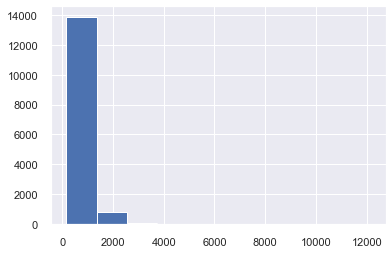

In [73]:
data1['size_sqft'].hist()

In [74]:
# Nan value replaced
data1['size_sqft'] = data1['size_sqft'].fillna(data1['size_sqft'].mean())

In [75]:
data1['size_sqft'].isnull().sum()

0

# location

In [76]:
data1['location'].isnull().sum()

0

In [77]:
data1['location'].value_counts()

Whitefield               593
Sarjapur  Road           437
Electronic City          337
Kanakpura Road           298
Thanisandra              277
                        ... 
Craig Park Layout          1
Soppahalli                 1
Nagarathpet                1
Ganga Nagar Extension      1
High grounds               1
Name: location, Length: 1357, dtype: int64

In [78]:
# location_labels = data5['location'].astype('category').cat.categories.tolist()
# location_map = {k: v for k,v in zip(location_labels,list(range(1,len(location_labels)+1)))}

# print(location_map)

In [79]:
#location_map

In [80]:
#label_encoder = LabelEncoder()

#data4['location_encoded'] = label_encoder.fit_transform(data4['location'])



In [81]:
#data5['location_encoded'] = data5['location'].map(location_map)

In [82]:
data1

,area_type,availability,location,size,society,total_sqft,bath,balcony,total_sqft_new,area_type_sq_feet,availability_maped,location_maped,size_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,1056.0,1300.0,42,430,900.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,2600.0,1500.0,82,325,640.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,1440.0,1100.0,82,1219,1350.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,1521.0,1300.0,82,778,1350.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,1200.0,1300.0,82,736,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,1246.0,1300.0,82,1284,900.0
14796,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,1660.0,1300.0,82,477,1350.0
14797,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,1216.0,1300.0,82,314,900.0
14798,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,996.0,1100.0,31,1208,900.0


# Socity

In [83]:
data1['society'].isnull().sum()

6128

In [84]:
data1['society'].value_counts().sort_values(ascending=False)

GrrvaGr    92
PrarePa    78
Prtates    64
Bhmesy     63
Sryalan    63
           ..
Skinaa      1
UKkente     1
Diarknt     1
SamesHo     1
ElavuHo     1
Name: society, Length: 2832, dtype: int64

In [85]:
society_labels = data1['society'].astype('category').cat.categories.tolist()
society_map = {k: v for k,v in zip(society_labels,list(range(1,len(society_labels)+1)))}

print(society_map)

{'3Codeli': 1, '7 ise P': 2, 'A idse ': 3, 'A rtsai': 4, 'ACersd ': 5, 'ACiteda': 6, 'ACopsva': 7, 'AFe 3Ph': 8, 'AGoutLa': 9, 'AHavenc': 10, 'AHodsWo': 11, 'ALoraAu': 12, 'ALtonea': 13, 'AMAKS O': 14, 'AMaveon': 15, 'APncyla': 16, 'APuraen': 17, 'APusenc': 18, 'ARaveSa': 19, 'AReenui': 20, 'ARestco': 21, 'ARineha': 22, 'ARineun': 23, 'ARipsul': 24, 'ARnamru': 25, 'ARncy R': 26, 'ARngsd ': 27, 'ARnts A': 28, 'ARntyne': 29, 'ARomee ': 30, 'ARureig': 31, 'ARvasV ': 32, 'AVeldun': 33, 'AWharan': 34, 'AWharde': 35, 'Aaentpa': 36, 'Aahts H': 37, 'AaineSi': 38, 'Aaire S': 39, 'Aaityi ': 40, 'Aangsur': 41, 'Aaniaa ': 42, 'Aantspa': 43, 'Aaubyya': 44, 'Aavelis': 45, 'AbarkVa': 46, 'Abeesmi': 47, 'Abialri': 48, 'AbiewLa': 49, 'Ablmsol': 50, 'AbnceEs': 51, 'Abncy R': 52, 'AcisePa': 53, 'Aconyit': 54, 'Adace P': 55, 'AdadeEs': 56, 'Adarkya': 57, 'Adarli ': 58, 'Adaveth': 59, 'Adeatlm': 60, 'Adens G': 61, 'AdentEl': 62, 'AdestAs': 63, 'Adevo S': 64, 'AdhriPa': 65, 'AdingSV': 66, 'Adion A': 67, 'Ad

In [86]:
data1['society_maped'] = data1['society'].map(society_map,na_action='ignore')

In [87]:


#data5['society'] = data5['society'].fillna(data5['society'].mode()[0])
data1['society'].isnull().sum()

6128

In [88]:
data1['society_maped'].isnull().sum()

6128

In [89]:
data1

,area_type,availability,location,size,society,total_sqft,bath,balcony,total_sqft_new,area_type_sq_feet,availability_maped,location_maped,size_sqft,society_maped
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,1056.0,1300.0,42,430,900.0,488.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,2600.0,1500.0,82,325,640.0,2569.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,1440.0,1100.0,82,1219,1350.0,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,1521.0,1300.0,82,778,1350.0,2303.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,1200.0,1300.0,82,736,900.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,1246.0,1300.0,82,1284,900.0,1676.0
14796,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,1660.0,1300.0,82,477,1350.0,NaN
14797,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,1216.0,1300.0,82,314,900.0,2627.0
14798,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,996.0,1100.0,31,1208,900.0,2072.0


In [90]:
data1['society'].dtype

dtype('O')

In [91]:
data1['society_maped'].dtype

dtype('float64')

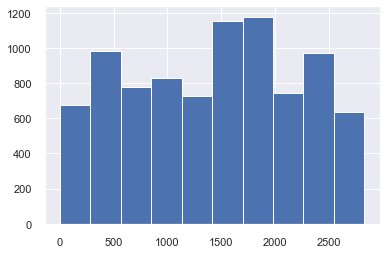

In [92]:
data1['society_maped'].hist()

In [93]:
data1.isnull().sum()

area_type                0
availability             0
location                 0
size                    18
society               6128
total_sqft               0
bath                    80
balcony                678
total_sqft_new           0
area_type_sq_feet        0
availability_maped       0
location_maped           0
size_sqft                0
society_maped         6128
dtype: int64

# Total_sqft

In [99]:
data1['total_sqft_new'].isnull().sum()

0

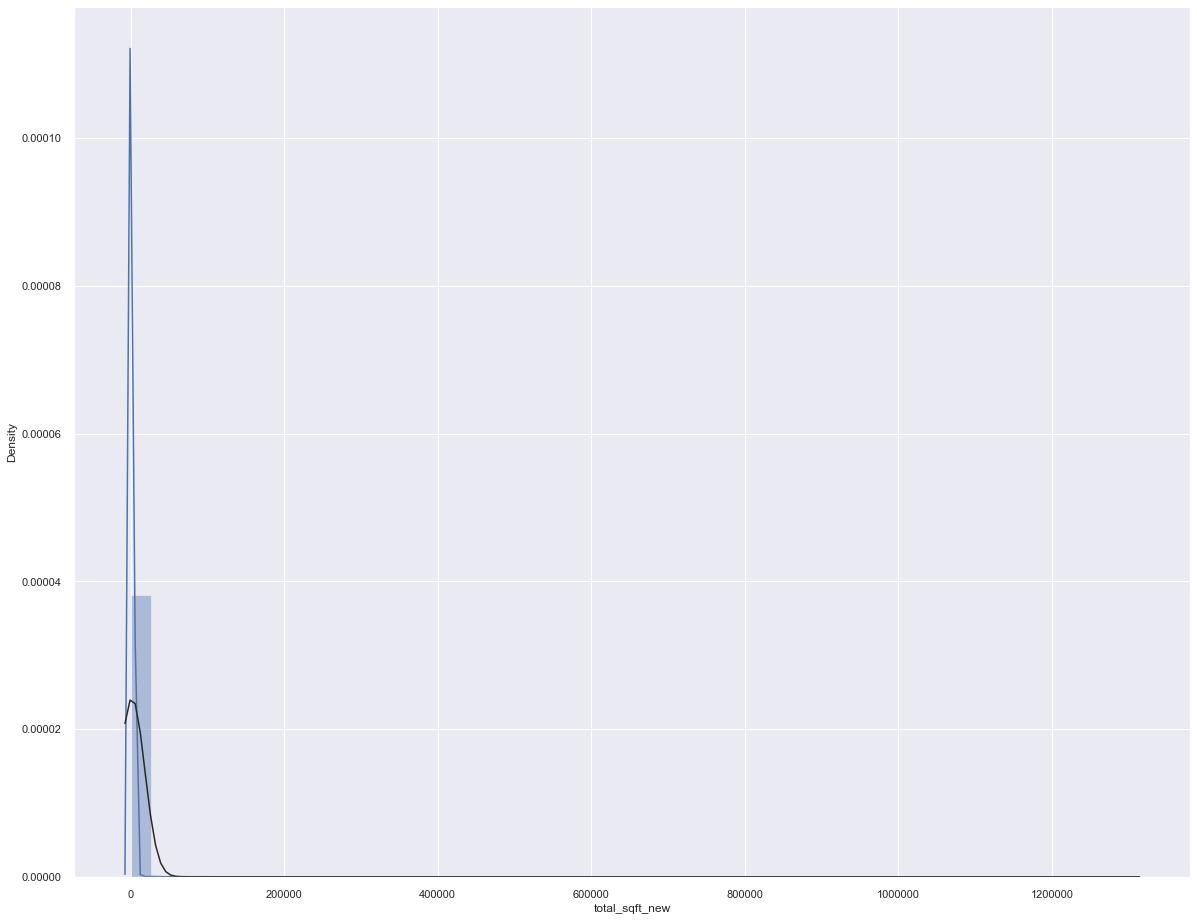

In [106]:
import scipy.stats
plt.figure(figsize=(20,16))
sns.distplot(data1['total_sqft_new'],kde=True,fit = scipy.stats.norm)
plt.show()

# Bath

In [108]:
data1['bath'].isnull().sum()

80

In [109]:
data1['bath'].value_counts()

2.0     7652
3.0     3657
4.0     1375
1.0      871
5.0      586
6.0      303
7.0      113
8.0       73
9.0       52
10.0      17
12.0       7
13.0       3
11.0       3
16.0       3
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

In [110]:
labels_bath = data1['bath'].astype('category').cat.categories.tolist()
bath_map = {k: v for k,v in zip(labels_bath,list(range(1,len(labels_bath)+1)))}

print(bath_map)

{1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10, 11.0: 11, 12.0: 12, 13.0: 13, 14.0: 14, 15.0: 15, 16.0: 16, 18.0: 17, 27.0: 18, 40.0: 19}


In [111]:
data1['bath'].dtype

dtype('float64')

In [112]:
# Apply OrdinalEncoding after fill the NaN values :)

# balcony

In [113]:
data1['balcony'].isnull().sum()

678

In [114]:
data1['balcony'].value_counts()

2.0    5658
1.0    5444
3.0    1861
0.0    1159
Name: balcony, dtype: int64

In [115]:
# Apply OrdinalEncoding After Handle the NaN values


In [116]:
#label_encoder = LabelEncoder()
#data5['society_encoded'] = label_encoder.fit_transform(data5['society']).astype('float64')

In [117]:
#data5['society_encoded']

In [118]:
#data6 = data5.copy()

In [119]:
data1

,area_type,availability,location,size,society,total_sqft,bath,balcony,total_sqft_new,area_type_sq_feet,availability_maped,location_maped,size_sqft,society_maped
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,1056.0,1300.0,42,430,900.0,488.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,2600.0,1500.0,82,325,640.0,2569.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,1440.0,1100.0,82,1219,1350.0,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,1521.0,1300.0,82,778,1350.0,2303.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,1200.0,1300.0,82,736,900.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,1246.0,1300.0,82,1284,900.0,1676.0
14796,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,1660.0,1300.0,82,477,1350.0,NaN
14797,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,1216.0,1300.0,82,314,900.0,2627.0
14798,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,996.0,1100.0,31,1208,900.0,2072.0


In [123]:
#data6['area_type'].value_counts()

In [124]:
# One Hot Encoding in area_type

#data6 = pd.get_dummies(data6,columns = ['area_type'])

#data6['area_type_encoded'] = label_encoder.fit_transform(data6['area_type']).astype('float64')




In [125]:
#data6

In [127]:
data2 = data1.copy()

In [129]:
data3 = data1.copy()

In [130]:
data2

,area_type,availability,location,size,society,total_sqft,bath,balcony,total_sqft_new,area_type_sq_feet,availability_maped,location_maped,size_sqft,society_maped
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,1056.0,1300.0,42,430,900.0,488.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,2600.0,1500.0,82,325,640.0,2569.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,1440.0,1100.0,82,1219,1350.0,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,1521.0,1300.0,82,778,1350.0,2303.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,1200.0,1300.0,82,736,900.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,1246.0,1300.0,82,1284,900.0,1676.0
14796,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,1660.0,1300.0,82,477,1350.0,NaN
14797,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,1216.0,1300.0,82,314,900.0,2627.0
14798,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,996.0,1100.0,31,1208,900.0,2072.0


In [131]:
# extract the values

data2.drop(columns=data2.columns[:6],axis=1, inplace=True)

In [132]:
data2

,bath,balcony,total_sqft_new,area_type_sq_feet,availability_maped,location_maped,size_sqft,society_maped
0,2.0,1.0,1056.0,1300.0,42,430,900.0,488.0
1,5.0,3.0,2600.0,1500.0,82,325,640.0,2569.0
2,2.0,3.0,1440.0,1100.0,82,1219,1350.0,NaN
3,3.0,1.0,1521.0,1300.0,82,778,1350.0,2303.0
4,2.0,1.0,1200.0,1300.0,82,736,900.0,NaN
...,...,...,...,...,...,...,...,...
14795,2.0,1.0,1246.0,1300.0,82,1284,900.0,1676.0
14796,3.0,2.0,1660.0,1300.0,82,477,1350.0,NaN
14797,2.0,2.0,1216.0,1300.0,82,314,900.0,2627.0
14798,2.0,1.0,996.0,1100.0,31,1208,900.0,2072.0


In [133]:
data2.isnull().sum()

bath                    80
balcony                678
total_sqft_new           0
area_type_sq_feet        0
availability_maped       0
location_maped           0
size_sqft                0
society_maped         6128
dtype: int64

In [ ]:
# Bath

#data7['bath'] = data7['bath'].fillna(data7['bath'].mean()+1)

In [134]:
data2['bath'].isnull().sum()

80

In [135]:
# Save the dataFrame

data2.to_csv(r'F:\Machine Learning\Macine Hack\Data\MergedData_Na_Included.csv')

In [ ]:
# Balcony

data7['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [138]:
data2.columns[data2.isna().sum()>0]

Index(['bath', 'balcony', 'society_maped'], dtype='object')

In [140]:
data2.dtypes

bath                  float64
balcony               float64
total_sqft_new        float64
area_type_sq_feet     float64
availability_maped      int64
location_maped          int64
size_sqft             float64
society_maped         float64
dtype: object

# Feature Engineering


In [142]:
# Nan value of bath
# 80 nan values
# Fill NaN values with KNeighbourRegressor

def knn_impute(df , na_target):
    df = df.copy()
    
    # all the data of numeric type
    numeric_df = df
    
    # all the columns of non na values
    non_na_colums = numeric_df.loc[ : , numeric_df.isna().sum()==0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna()==False,na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna()==False,non_na_colums]
    
    X_test = numeric_df.loc[numeric_df[na_target].isna()==True,non_na_colums]
    
    knn = KNeighborsRegressor()
    
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna()==True,na_target] = y_pred
    
    
    
    return df



In [143]:
for col in ['bath', 'balcony', 'society_maped']:
    data2 = knn_impute(data2,col)

In [144]:
data2

,bath,balcony,total_sqft_new,area_type_sq_feet,availability_maped,location_maped,size_sqft,society_maped
0,2.0,1.0,1056.0,1300.0,42,430,900.0,488.0
1,5.0,3.0,2600.0,1500.0,82,325,640.0,2569.0
2,2.0,3.0,1440.0,1100.0,82,1219,1350.0,599.8
3,3.0,1.0,1521.0,1300.0,82,778,1350.0,2303.0
4,2.0,1.0,1200.0,1300.0,82,736,900.0,1755.0
...,...,...,...,...,...,...,...,...
14795,2.0,1.0,1246.0,1300.0,82,1284,900.0,1676.0
14796,3.0,2.0,1660.0,1300.0,82,477,1350.0,1489.4
14797,2.0,2.0,1216.0,1300.0,82,314,900.0,2627.0
14798,2.0,1.0,996.0,1100.0,31,1208,900.0,2072.0


In [145]:
data2.isnull().sum()

bath                  0
balcony               0
total_sqft_new        0
area_type_sq_feet     0
availability_maped    0
location_maped        0
size_sqft             0
society_maped         0
dtype: int64

In [146]:
data4 = data2.copy()

In [147]:
data4.to_csv(r'F:\Machine Learning\Macine Hack\Data\Marged_WithOut_NaN.csv')

In [148]:
data4['balcony'].value_counts()

2.0    5780
1.0    5480
3.0    1868
0.0    1159
1.8     101
1.6      84
2.2      83
2.4      68
1.2      52
1.4      51
2.6      39
0.8      15
2.8      11
0.6       7
0.4       2
Name: balcony, dtype: int64

In [149]:
data2['bath'].value_counts()

2.0     7655
3.0     3663
4.0     1379
1.0      877
5.0      591
6.0      303
7.0      113
8.0       73
9.0       52
10.0      17
5.4        8
12.0       7
4.4        5
3.2        5
2.6        4
4.2        4
16.0       3
2.4        3
13.0       3
6.4        3
5.8        3
2.8        3
3.8        3
3.6        3
11.0       3
5.2        2
5.6        2
4.6        2
4.8        2
40.0       1
7.2        1
14.0       1
6.2        1
15.0       1
18.0       1
3.4        1
27.0       1
6.6        1
Name: bath, dtype: int64

In [150]:
#data7['balcony'] = data7['balcony'].fillna(data7['balcony'].mean()+1)

In [151]:
#data7['balcony'].isnull().sum()

In [152]:
#data8 = data7.copy()

In [153]:
#data8

In [154]:
data4.corr()

,bath,balcony,total_sqft_new,area_type_sq_feet,availability_maped,location_maped,size_sqft,society_maped
bath,1.000000,0.199980,0.051412,0.245710,0.052966,0.001898,0.446027,-0.035414
balcony,0.199980,1.000000,0.001553,-0.009460,0.097975,-0.001071,0.306085,-0.011448
total_sqft_new,0.051412,0.001553,1.000000,0.018812,-0.004475,-0.000113,0.005273,-0.004653
area_type_sq_feet,0.245710,-0.009460,0.018812,1.000000,-0.004842,0.024334,-0.225044,-0.066234
availability_maped,0.052966,0.097975,-0.004475,-0.004842,1.000000,0.003075,-0.013195,-0.071916
location_maped,0.001898,-0.001071,-0.000113,0.024334,0.003075,1.000000,-0.005032,-0.014484
size_sqft,0.446027,0.306085,0.005273,-0.225044,-0.013195,-0.005032,1.000000,0.013994
society_maped,-0.035414,-0.011448,-0.004653,-0.066234,-0.071916,-0.014484,0.013994,1.000000


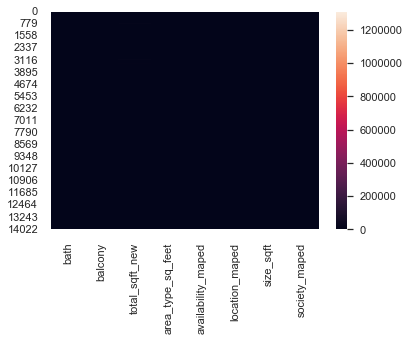

In [155]:
sns.heatmap(data4)

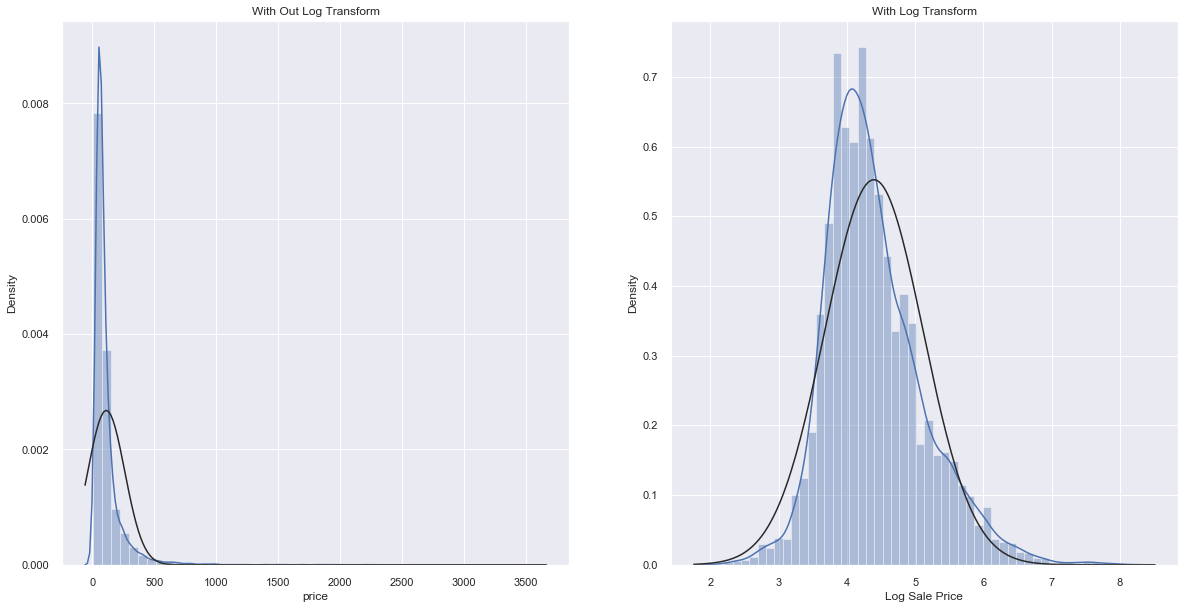

In [170]:
import scipy.stats
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(target,kde=True,fit = scipy.stats.norm)
plt.title("With Out Log Transform")
plt.subplot(1,2,2)
sns.distplot(np.log(target),kde=True,fit = scipy.stats.norm)
plt.xlabel('Log Sale Price')
plt.title("With Log Transform")

plt.show()

In [171]:
target

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13320, dtype: float64

In [172]:
log_target = np.log(target)

In [173]:
log_target

0        3.665355
1        4.787492
2        4.127134
3        4.553877
4        3.931826
           ...   
13315    5.442418
13316    5.991465
13317    4.094345
13318    6.190315
13319    2.833213
Name: price, Length: 13320, dtype: float64

In [174]:
train_final = data4.loc[:df.index.max(), :].copy()
test_final = data4.loc[df.index.max() + 1:, :].reset_index(drop=True).copy()

In [175]:
train_final.shape

(13320, 8)

In [176]:
train_final

,bath,balcony,total_sqft_new,area_type_sq_feet,availability_maped,location_maped,size_sqft,society_maped
0,2.0,1.0,1056.0,1300.0,42,430,900.0,488.0
1,5.0,3.0,2600.0,1500.0,82,325,640.0,2569.0
2,2.0,3.0,1440.0,1100.0,82,1219,1350.0,599.8
3,3.0,1.0,1521.0,1300.0,82,778,1350.0,2303.0
4,2.0,1.0,1200.0,1300.0,82,736,900.0,1755.0
...,...,...,...,...,...,...,...,...
13315,4.0,0.0,3453.0,1100.0,82,1296,800.0,221.0
13316,5.0,2.4,3600.0,1300.0,82,1039,1800.0,1595.0
13317,2.0,1.0,1141.0,1100.0,82,1004,900.0,1281.0
13318,4.0,1.0,4689.0,1300.0,34,937,1800.0,2322.0


In [177]:
test_final.shape

(1480, 8)

In [178]:
print(train_final.isnull().sum())
print(test_final.isnull().sum())

bath                  0
balcony               0
total_sqft_new        0
area_type_sq_feet     0
availability_maped    0
location_maped        0
size_sqft             0
society_maped         0
dtype: int64
bath                  0
balcony               0
total_sqft_new        0
area_type_sq_feet     0
availability_maped    0
location_maped        0
size_sqft             0
society_maped         0
dtype: int64


In [179]:
log_target.dtype

dtype('float64')

In [180]:
train_final.dtypes

bath                  float64
balcony               float64
total_sqft_new        float64
area_type_sq_feet     float64
availability_maped      int64
location_maped          int64
size_sqft             float64
society_maped         float64
dtype: object

In [181]:
test_final.dtypes

bath                  float64
balcony               float64
total_sqft_new        float64
area_type_sq_feet     float64
availability_maped      int64
location_maped          int64
size_sqft             float64
society_maped         float64
dtype: object

# Model Selection

In [184]:
data5 = pd.concat([train_final , log_target],axis = 1)


In [185]:
data5

,bath,balcony,total_sqft_new,area_type_sq_feet,availability_maped,location_maped,size_sqft,society_maped,price
0,2.0,1.0,1056.0,1300.0,42,430,900.0,488.0,3.665355
1,5.0,3.0,2600.0,1500.0,82,325,640.0,2569.0,4.787492
2,2.0,3.0,1440.0,1100.0,82,1219,1350.0,599.8,4.127134
3,3.0,1.0,1521.0,1300.0,82,778,1350.0,2303.0,4.553877
4,2.0,1.0,1200.0,1300.0,82,736,900.0,1755.0,3.931826
...,...,...,...,...,...,...,...,...,...
13315,4.0,0.0,3453.0,1100.0,82,1296,800.0,221.0,5.442418
13316,5.0,2.4,3600.0,1300.0,82,1039,1800.0,1595.0,5.991465
13317,2.0,1.0,1141.0,1100.0,82,1004,900.0,1281.0,4.094345
13318,4.0,1.0,4689.0,1300.0,34,937,1800.0,2322.0,6.190315


In [186]:
data5.columns

Index(['bath', 'balcony', 'total_sqft_new', 'area_type_sq_feet',
       'availability_maped', 'location_maped', 'size_sqft', 'society_maped',
       'price'],
      dtype='object')

In [187]:
data5.dtypes

bath                  float64
balcony               float64
total_sqft_new        float64
area_type_sq_feet     float64
availability_maped      int64
location_maped          int64
size_sqft             float64
society_maped         float64
price                 float64
dtype: object

In [188]:
data5

,bath,balcony,total_sqft_new,area_type_sq_feet,availability_maped,location_maped,size_sqft,society_maped,price
0,2.0,1.0,1056.0,1300.0,42,430,900.0,488.0,3.665355
1,5.0,3.0,2600.0,1500.0,82,325,640.0,2569.0,4.787492
2,2.0,3.0,1440.0,1100.0,82,1219,1350.0,599.8,4.127134
3,3.0,1.0,1521.0,1300.0,82,778,1350.0,2303.0,4.553877
4,2.0,1.0,1200.0,1300.0,82,736,900.0,1755.0,3.931826
...,...,...,...,...,...,...,...,...,...
13315,4.0,0.0,3453.0,1100.0,82,1296,800.0,221.0,5.442418
13316,5.0,2.4,3600.0,1300.0,82,1039,1800.0,1595.0,5.991465
13317,2.0,1.0,1141.0,1100.0,82,1004,900.0,1281.0,4.094345
13318,4.0,1.0,4689.0,1300.0,34,937,1800.0,2322.0,6.190315


In [189]:
data5.dtypes

bath                  float64
balcony               float64
total_sqft_new        float64
area_type_sq_feet     float64
availability_maped      int64
location_maped          int64
size_sqft             float64
society_maped         float64
price                 float64
dtype: object

In [190]:
#data10['location_encoded'] = data10['location_encoded'].astype(int).astype(float)

In [191]:
data5.dtypes

bath                  float64
balcony               float64
total_sqft_new        float64
area_type_sq_feet     float64
availability_maped      int64
location_maped          int64
size_sqft             float64
society_maped         float64
price                 float64
dtype: object

In [192]:
from pycaret.regression import *

model_select = setup(data5 , target ='price')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:18:51
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling


TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2260,0.1025,0.3198,0.8013,0.0576,0.0513,0.147
rf,Random Forest Regressor,0.2263,0.1137,0.3368,0.7796,0.0603,0.0511,2.479
gbr,Gradient Boosting Regressor,0.2565,0.1224,0.3496,0.7626,0.0633,0.0585,0.626
et,Extra Trees Regressor,0.2383,0.1269,0.3559,0.7539,0.0638,0.0539,1.705
knn,K Neighbors Regressor,0.2664,0.1547,0.3930,0.6998,0.0707,0.0602,0.077
ada,AdaBoost Regressor,0.3342,0.1907,0.4364,0.6296,0.0812,0.0788,0.262
dt,Decision Tree Regressor,0.2891,0.1992,0.4458,0.6122,0.0793,0.0650,0.051
br,Bayesian Ridge,0.4042,0.3044,0.5512,0.4090,0.0968,0.0915,0.018
ridge,Ridge Regression,0.4042,0.3044,0.5512,0.4089,0.0968,0.0915,0.014
lar,Least Angle Regression,0.4042,0.3044,0.5512,0.4089,0.0968,0.0915,0.016


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=8582, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lightgbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2257,0.1162,0.3409,0.7849,0.0619,0.0522
1,0.2329,0.1068,0.3268,0.8128,0.0576,0.0520
2,0.2193,0.0931,0.3051,0.7895,0.0559,0.0506
3,0.2276,0.0968,0.3111,0.8207,0.0552,0.0511
4,0.2300,0.1114,0.3338,0.8004,0.0596,0.0518
5,0.2239,0.1059,0.3254,0.7989,0.0599,0.0518
6,0.2290,0.0963,0.3102,0.8005,0.0556,0.0516
7,0.2356,0.1095,0.3309,0.7845,0.0587,0.0529
8,0.2196,0.1020,0.3194,0.7926,0.0570,0.0493


In [ ]:
lightgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 8582,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
rf_model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2322,0.1388,0.3725,0.7433,0.0664,0.0532
1,0.2276,0.1125,0.3354,0.8027,0.0594,0.0507
2,0.2194,0.1012,0.3180,0.7713,0.0578,0.0503
3,0.2271,0.1065,0.3263,0.8027,0.0578,0.0508
4,0.2269,0.1197,0.3460,0.7855,0.0618,0.0509
5,0.2204,0.1175,0.3427,0.7769,0.0623,0.0506
6,0.2274,0.1051,0.3242,0.7822,0.0579,0.0510
7,0.2391,0.1255,0.3543,0.7530,0.0625,0.0533
8,0.2241,0.1134,0.3367,0.7695,0.0602,0.0503


In [ ]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 8582,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gbr_model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2474,0.1274,0.3569,0.7643,0.0651,0.0573
1,0.2589,0.1213,0.3482,0.7874,0.0618,0.0581
2,0.2469,0.1092,0.3304,0.7531,0.0610,0.0574
3,0.2588,0.1209,0.3476,0.7761,0.0624,0.0586
4,0.2659,0.1364,0.3693,0.7556,0.0663,0.0603
5,0.2625,0.1279,0.3577,0.7570,0.0658,0.0607
6,0.2589,0.1176,0.3430,0.7562,0.0616,0.0586
7,0.2649,0.1312,0.3622,0.7419,0.0646,0.0596
8,0.2524,0.1255,0.3543,0.7449,0.0635,0.0566


In [ ]:
gbr_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 8582,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
et_model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2372,0.1414,0.3760,0.7385,0.0681,0.0548
1,0.2398,0.1292,0.3595,0.7735,0.0638,0.0535
2,0.2373,0.1196,0.3459,0.7295,0.0629,0.0541
3,0.2391,0.1236,0.3516,0.7709,0.0617,0.0532
4,0.2450,0.1360,0.3688,0.7564,0.0655,0.0548
5,0.2381,0.1385,0.3722,0.7369,0.0675,0.0547
6,0.2321,0.1137,0.3371,0.7645,0.0608,0.0520
7,0.2479,0.1360,0.3688,0.7324,0.0657,0.0557
8,0.2371,0.1221,0.3494,0.7518,0.0626,0.0533


In [ ]:
et_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 8582,
 'verbose': 0,
 'warm_start': False}

In [ ]:
knn_model = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2704,0.1754,0.4188,0.6755,0.0760,0.0621
1,0.2684,0.1538,0.3922,0.7303,0.0695,0.0594
2,0.2591,0.1396,0.3737,0.6843,0.0683,0.0595
3,0.2716,0.1530,0.3912,0.7165,0.0695,0.0606
4,0.2639,0.1573,0.3966,0.7181,0.0706,0.0590
5,0.2592,0.1544,0.3930,0.7067,0.0716,0.0595
6,0.2667,0.1485,0.3854,0.6922,0.0689,0.0596
7,0.2837,0.1766,0.4202,0.6525,0.0751,0.0635
8,0.2599,0.1466,0.3828,0.7021,0.0691,0.0585


In [ ]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
ada_model = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3346,0.1964,0.4432,0.6366,0.0841,0.0809
1,0.3332,0.1846,0.4297,0.6763,0.0780,0.0766
2,0.3129,0.1663,0.4079,0.6238,0.0771,0.0748
3,0.3295,0.1877,0.4332,0.6523,0.0804,0.0774
4,0.3354,0.1899,0.4358,0.6598,0.0811,0.0792
5,0.3412,0.1968,0.4436,0.6263,0.0831,0.0814
6,0.3252,0.1810,0.4255,0.6248,0.0788,0.0759
7,0.3493,0.2144,0.4631,0.5781,0.0841,0.0804
8,0.3570,0.2105,0.4588,0.5721,0.0850,0.0838


In [ ]:
ada_model.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 8582}

In [ ]:
# catboost_params = {
#     'iterations': 6000,
#     'learning_rate': 0.005,
#     'depth': 4,
#     'l2_leaf_reg': 1,
#     'eval_metric':'RMSE',
#     'early_stopping_rounds': 200,
#     'random_seed': 42
# }

# br_params = {
#     'n_iter': 304,
#     'tol': 0.16864712769300896,
#     'alpha_1': 5.589616542154059e-07,
#     'alpha_2': 9.799343618469923,
#     'lambda_1': 1.7735725582463822,
#     'lambda_2': 3.616928181181732e-06
# }

lightgbm_params = {
        'boosting_type': 'gbdt',
        'class_weight': None,
        'colsample_bytree': 1.0,
        'importance_type': 'split',
        'learning_rate': 0.1,
        'max_depth': -1,
        'min_child_samples': 20,
        'min_child_weight': 0.001,
        'min_split_gain': 0.0,
        'n_estimators': 100,
        'n_jobs': -1,
        'num_leaves': 31,
        'objective': None,
        'random_state': 8582,
        'reg_alpha': 0.0,
        'reg_lambda': 0.0,
        'silent': 'warn',
        'subsample': 1.0,
        'subsample_for_bin': 200000,
        'subsample_freq': 0
     
}

rf_params = {
      'bootstrap': True,
      'ccp_alpha': 0.0,
      'criterion': 'mse',
      'max_depth': None,
      'max_features': 'auto',
      'max_leaf_nodes': None,
      'max_samples': None,
      'min_impurity_decrease': 0.0,
      'min_impurity_split': None,
      'min_samples_leaf': 1,
      'min_samples_split': 2,
      'min_weight_fraction_leaf': 0.0,
      'n_estimators': 100,
      'n_jobs': -1,
      'oob_score': False,
      'random_state': 8582,
      'verbose': 0,
      'warm_start': False
  }

gbr_params = {
      'alpha': 0.9,
      'ccp_alpha': 0.0,
      'criterion': 'friedman_mse',
      'init': None,
      'learning_rate': 0.1,
      'loss': 'ls',
      'max_depth': 3,
      'max_features': None,
      'max_leaf_nodes': None,
      'min_impurity_decrease': 0.0,
      'min_impurity_split': None,
      'min_samples_leaf': 1,
      'min_samples_split': 2,
      'min_weight_fraction_leaf': 0.0,
      'n_estimators': 100,
      'n_iter_no_change': None,
      'presort': 'deprecated',
      'random_state': 8582,
      'subsample': 1.0,
      'tol': 0.0001,
      'validation_fraction': 0.1,
      'verbose': 0,
      'warm_start': False
  }


et_params = {
      'bootstrap': False,
      'ccp_alpha': 0.0,
      'criterion': 'mse',
      'max_depth': None,
      'max_features': 'auto',
      'max_leaf_nodes': None,
      'max_samples': None,
      'min_impurity_decrease': 0.0,
      'min_impurity_split': None,
      'min_samples_leaf': 1,
      'min_samples_split': 2,
      'min_weight_fraction_leaf': 0.0,
      'n_estimators': 100,
      'n_jobs': -1,
      'oob_score': False,
      'random_state': 8582,
      'verbose': 0,
      'warm_start': False
 }

knn_params = {
          'algorithm': 'auto',
          'leaf_size': 30,
          'metric': 'minkowski',
          'metric_params': None,
          'n_jobs': -1,
          'n_neighbors': 5,
          'p': 2,
          'weights': 'uniform'
  }

ada_params = {
    'base_estimator': None,
    'learning_rate': 1.0,
    'loss': 'linear',
    'n_estimators': 50,
    'random_state': 8582
 }

# ridge_params = {
#     'alpha': 631.1412445239156
# }

In [ ]:
models = {
    
    "lightgbm": LGBMRegressor(**lightgbm_params),
    "rf": RandomForestRegressor(**rf_params),
    "gbr":  GradientBoostingRegressor(**gbr_params),
    "et": ExtraTreesRegressor(**et_params),
    "knn": KNeighborsRegressor(**knn_params),
    "ada": AdaBoostRegressor(**ada_params)

}

In [ ]:
for name, model in models.items():
  model.fit(train_final, log_target)
  print(name + " trained.")

lightgbm trained.
rf trained.
gbr trained.
et trained.
knn trained.
ada trained.


In [ ]:
results = {}
kf = KFold(n_splits=10)

for name, model in models.items():
  result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
  results[name] = result

In [ ]:
results

{'ada': array([1.56412888, 1.57315608, 1.5268779 , 1.54416327, 1.59088728,
        1.57466331, 1.56970221, 1.55004307, 1.59832445, 1.56416976]),
 'et': array([1.4069218 , 1.40578309, 1.40920668, 1.40389325, 1.41057606,
        1.4545936 , 1.46559079, 1.40487521, 1.42670761, 1.39519394]),
 'gbr': array([1.40678654, 1.41995737, 1.39928798, 1.40224187, 1.41530953,
        1.44684974, 1.44166933, 1.40166465, 1.4299494 , 1.40781107]),
 'knn': array([1.46106291, 1.45982877, 1.4495952 , 1.45669869, 1.45808888,
        1.50556293, 1.49132939, 1.45180344, 1.48019883, 1.4524395 ]),
 'lightgbm': array([1.36633279, 1.37604611, 1.3546289 , 1.35680099, 1.37330857,
        1.39947899, 1.38582641, 1.34864126, 1.37882352, 1.35685877]),
 'rf': array([1.37445297, 1.38525645, 1.37848126, 1.3766658 , 1.38288635,
        1.4219893 , 1.42239227, 1.36728841, 1.39843947, 1.36984206])}

In [ ]:
 for name, result in results.items():
     print("----------\n" + name)
     print(np.mean(result))
     print(np.std(result))

----------
lightgbm
1.3696746307827268
0.015154551842660482
----------
rf
1.387769432549703
0.019082718617765858
----------
gbr
1.4171527474529755
0.016229856804389296
----------
et
1.4183342037012485
0.02230352834573544
----------
knn
1.4666608532793897
0.018083552429733293
----------
ada
1.5656116211718458
0.020178114252141378


In [ ]:
 final_predictions = (
     0.4 * np.exp(models['lightgbm'].predict(test_final)) +
     0.2 * np.exp(models['rf'].predict(test_final)) +
     0.2 * np.exp(models['gbr'].predict(test_final)) +
     0.1 * np.exp(models['et'].predict(test_final)) +
     0.1 * np.exp(models['knn'].predict(test_final))+
     0.5 * np.exp(models['ada'].predict(test_final))
 )

In [ ]:
final_predictions

array([ 94.39593618, 376.65888227, 282.319958  , ...,  83.41278399,
        90.49628851,  94.84847391])

In [ ]:
#train_final.dtypes

In [ ]:
#baseline_model =CatBoostRegressor(verbose=0)

In [ ]:
#baseline_model.fit(train_final,log_target)

In [ ]:
# kf = KFold(n_splits=10)
# results = cross_val_score(baseline_model,train_final,log_target,scoring='neg_mean_squared_error',cv=kf)

In [ ]:
# -results

In [ ]:
# -results.mean()

In [ ]:
# plt.figure(figsize=(16,10))
# sns.displot(-results)

In [ ]:
# np.exp(np.sqrt(np.mean(-results)))

In [ ]:
# target.describe()

In [ ]:
log_target

0        3.665355
1        4.787492
2        4.127134
3        4.553877
4        3.931826
           ...   
13315    5.442418
13316    5.991465
13317    4.094345
13318    6.190315
13319    2.833213
Name: price, Length: 13320, dtype: float64

In [ ]:
#predictions = np.exp(baseline_model.predict(test_final))

In [ ]:
submission = pd.concat([test_columns,pd.Series(final_predictions , name = 'price')],axis = 1)

In [ ]:
submission

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,94.395936
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,376.658882
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,282.319958
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,94.059045
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,86.744123
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,103.660820
1476,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,130.572732
1477,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,83.412784
1478,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,90.496289


In [ ]:
submission.to_csv('/content/House Price Prediction in Bangaluru/Submission_conbined.csv')

In [ ]:
#print(np.__version__)

In [ ]:
# CatboostRegressor-0.87395